### Covid 19 Cases Analysis (D. Cornea)

Covid 19 is a disease caused by a virus that easily spreads from person to person and affected people from the whole world since end of 2019. Data about the pandemic is available in different forms and it is updated every day. 

The data source used for this Covid Cases analysis project is owid-covid-data.csv from the ourworldindata.org as well as the country_vaccinations.csv from kaggle.com.

According the the owid-covid-data on 15th December 2021 there were 272,205,417 cases recorded worldwide.

Since the pandemic started, countries like United States, India and Brazil recorded more than 22 million cases each. 

From the data analysed correlation between new cases and new vaccines or people fully vaccinated is very weak.

However, there is a strong positive correlation between the new cases and new deaths demonstrated by a r-squared of 0.71.

Vaccination data shows that the countries with the highest number of people vaccinated are India with 781MIL people vaccinated, United States 234.6MIL and Brazil 163MIL. However, China, India and United States are the countries with the highest number of people fully vaccinated.

The highest number of cases per million of population have been recorded in Montenegro, Seychelles and Andorra.
People fully vaccinated per hundred had the highest rate in Gibraltar 118.19%, United Arab Emirates	89.34% and Chile 83.82%.

Selected countries used as sample for further analysis had more than 100,000 cases and have a GDP higher than 30,000 and a human development index higher than 0.8.
From the selected countries, France and Germany had high number of new cases in around April but the highest number of new cases had been recorded in November.

The vaccination rate varies with Singapore having 87% of population fully vaccinated, Ireland 76% and Australia 75%.

The cases per hundred rate for the selected countries varies from 21% in Slovenia, 14.5% Israel and only 0.8% in Australia.

When analysing the data whithout considering other factors, the results show that in Australia the number of cases increased when the fully vaccinated population increased also. The correlation factor shows a strong positive correlation. However, there are other contextual factors to be considered before drawing a conclusion on the correlation between vaccine and new cases. These factors would include lockdowns, border closure, social distancing, and others.

There are various online application that allow realtime data retrieval with the latest Covid 19 information. As an example,  when using COVID-19 Data Hub, information for selected country and date can be displayed as a total or for each region or state of the country.  For instance, on 29/12/21 South Australia had a total of 7,631 confirmed cases and 1,267 recovered.  


In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from datetime import datetime
import requests
import numpy as np
import seaborn as sns
sns.set()
import plotly.express as px
import squarify
from scipy.stats import linregress
import altair as alt
import wordcloud as wordcloud
import kaleido
import matplotlib.dates as mdates
from covid19dh import covid19


In [3]:
# import data files
# read the cases csv file

cases = pd.read_csv('./Resources/owid-covid-data.csv')
cases.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  24/02/2020          5.0        5.0   
1      AFG      Asia  Afghanistan  25/02/2020          5.0        0.0   
2      AFG      Asia  Afghanistan  26/02/2020          5.0        0.0   
3      AFG      Asia  Afghanistan  27/02/2020          5.0        0.0   
4      AFG      Asia  Afghanistan  28/02/2020          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [4]:
# format the date column
cases['date'] = pd.to_datetime(cases['date'])

In [5]:
# select the worldwide data
owid_world_df=cases.loc[cases["iso_code"]=='OWID_WRL']
owid_world_df.tail()

iso_code continent location       date  total_cases  new_cases  \
139061  OWID_WRL       NaN    World 2021-11-12  269739121.0   488565.0   
139062  OWID_WRL       NaN    World 2021-12-12  270159882.0   420761.0   
139063  OWID_WRL       NaN    World 2021-12-13  270795523.0   635641.0   
139064  OWID_WRL       NaN    World 2021-12-14  271469226.0   673703.0   
139065  OWID_WRL       NaN    World 2021-12-15  272205417.0   736191.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
139061          613910.286     5301760.0      5709.0             7558.429   
139062          611636.429     5306078.0      4318.0             7151.429   
139063          617638.286     5312553.0      6475.0             7073.286   
139064          615150.000     5320822.0      8269.0             7084.857   
139065          624439.429     5329879.0      9057.0             7239.571   

        ...  female_smokers  male_smokers  handwashing_facilities  \
139061  ...           6.434        34.635                   60.13   
139062  ...           6.434        34.635                   60.13   
139063  ...           6.434        34.635                   60.13   
139064  ...           6.434        34.635                   60.13   
139065  ...           6.434        34.635                   60.13   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
139061                       2.705            72.58                    0.737   
139062                       2.705            72.58                    0.737   
139063                       2.705            72.58                    0.737   
139064                       2.705            72.58                    0.737   
139065                       2.705            72.58                    0.737   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
139061                                   NaN                          NaN   
139062                                   NaN                          NaN   
139063                                   NaN                          NaN   
139064                                   NaN                          NaN   
139065                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
139061               NaN                                      NaN  
139062               NaN                                      NaN  
139063               NaN                                      NaN  
139064               NaN                                      NaN  
139065               NaN                                      NaN  

[5 rows x 67 columns]

In [6]:
# replace NaN values with zero
owid_world_df = owid_world_df.replace(np.nan, 0)
owid_world_df.head()

iso_code  continent location       date  total_cases  new_cases  \
138372  OWID_WRL          0    World 2020-01-22        557.0        0.0   
138373  OWID_WRL          0    World 2020-01-23        655.0       98.0   
138374  OWID_WRL          0    World 2020-01-24        941.0      286.0   
138375  OWID_WRL          0    World 2020-01-25       1434.0      493.0   
138376  OWID_WRL          0    World 2020-01-26       2118.0      684.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
138372                 0.0          17.0         0.0                  0.0   
138373                 0.0          18.0         1.0                  0.0   
138374                 0.0          26.0         8.0                  0.0   
138375                 0.0          42.0        16.0                  0.0   
138376                 0.0          56.0        14.0                  0.0   

        ...  female_smokers  male_smokers  handwashing_facilities  \
138372  ...           6.434        34.635                   60.13   
138373  ...           6.434        34.635                   60.13   
138374  ...           6.434        34.635                   60.13   
138375  ...           6.434        34.635                   60.13   
138376  ...           6.434        34.635                   60.13   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
138372                       2.705            72.58                    0.737   
138373                       2.705            72.58                    0.737   
138374                       2.705            72.58                    0.737   
138375                       2.705            72.58                    0.737   
138376                       2.705            72.58                    0.737   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
138372                                   0.0                          0.0   
138373                                   0.0                          0.0   
138374                                   0.0                          0.0   
138375                                   0.0                          0.0   
138376                                   0.0                          0.0   

        excess_mortality  excess_mortality_cumulative_per_million  
138372               0.0                                      0.0  
138373               0.0                                      0.0  
138374               0.0                                      0.0  
138375               0.0                                      0.0  
138376               0.0                                      0.0  

[5 rows x 67 columns]

In [7]:
# cases data to 15/12/21
owid_world_df.describe()

continent   total_cases      new_cases  new_cases_smoothed  \
count      694.0  6.940000e+02     694.000000          694.000000   
mean         0.0  1.012548e+08  391364.632565       388634.108476   
std          0.0  8.923303e+07  234877.576961       227333.292997   
min          0.0  5.570000e+02       0.000000            0.000000   
25%          0.0  1.317076e+07  213944.000000       212312.035500   
50%          0.0  8.516400e+07  415324.500000       416758.714500   
75%          0.0  1.807810e+08  571593.750000       585084.642750   
max          0.0  2.722054e+08  908289.000000       827219.857000   

       total_deaths    new_deaths  new_deaths_smoothed  \
count  6.940000e+02    694.000000           694.000000   
mean   2.240322e+06   7655.550432          7623.799307   
std    1.755554e+06   3831.803080          3538.694917   
min    1.700000e+01      0.000000             0.000000   
25%    6.037012e+05   5422.000000          5489.535750   
50%    1.902616e+06   7403.500000          7356.285500   
75%    3.910972e+06  10147.250000         10025.821750   
max    5.329879e+06  18007.000000         14703.286000   

       total_cases_per_million  new_cases_per_million  \
count               694.000000             694.000000   
mean              12857.814576              49.697305   
std               11331.228288              29.825866   
min                   0.071000               0.000000   
25%                1672.485250              27.167250   
50%               10814.523000              52.740000   
75%               22956.411750              72.584000   
max               34565.918000             115.339000   

       new_cases_smoothed_per_million  ...  female_smokers  male_smokers  \
count                      694.000000  ...    6.940000e+02  6.940000e+02   
mean                        49.350581  ...    6.434000e+00  3.463500e+01   
std                         28.867840  ...    9.688127e-14  3.768593e-13   
min                          0.000000  ...    6.434000e+00  3.463500e+01   
25%                         26.960250  ...    6.434000e+00  3.463500e+01   
50%                         52.922000  ...    6.434000e+00  3.463500e+01   
75%                         74.297000  ...    6.434000e+00  3.463500e+01   
max                        105.044000  ...    6.434000e+00  3.463500e+01   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count            6.940000e+02                6.940000e+02     6.940000e+02   
mean             6.013000e+01                2.705000e+00     7.258000e+01   
std              3.057537e-13                2.355370e-14     1.166131e-12   
min              6.013000e+01                2.705000e+00     7.258000e+01   
25%              6.013000e+01                2.705000e+00     7.258000e+01   
50%              6.013000e+01                2.705000e+00     7.258000e+01   
75%              6.013000e+01                2.705000e+00     7.258000e+01   
max              6.013000e+01                2.705000e+00     7.258000e+01   

       human_development_index  excess_mortality_cumulative_absolute  \
count             6.940000e+02                                 694.0   
mean              7.370000e-01                                   0.0   
std               9.665907e-15                                   0.0   
min               7.370000e-01                                   0.0   
25%               7.370000e-01                                   0.0   
50%               7.370000e-01                                   0.0   
75%               7.370000e-01                                   0.0   
max               7.370000e-01                                   0.0   

       excess_mortality_cumulative  excess_mortality  \
count                        694.0             694.0   
mean                           0.0               0.0   
std                            0.0               0.0   
min                            0.0               0.0   
25%                            

In [8]:
owid_world_df.groupby("date")
owid_world_c_df= owid_world_df[["new_cases", "new_vaccinations", "people_fully_vaccinated", "new_deaths", "total_deaths","date"]]

print(owid_world_c_df.corr().to_string())


                         new_cases  new_vaccinations  people_fully_vaccinated  new_deaths  total_deaths
new_cases                 1.000000          0.517215                 0.326705    0.844645      0.682238
new_vaccinations          0.517215          1.000000                 0.712520    0.354095      0.892366
people_fully_vaccinated   0.326705          0.712520                 1.000000    0.072918      0.803480
new_deaths                0.844645          0.354095                 0.072918    1.000000      0.487191
total_deaths              0.682238          0.892366                 0.803480    0.487191      1.000000


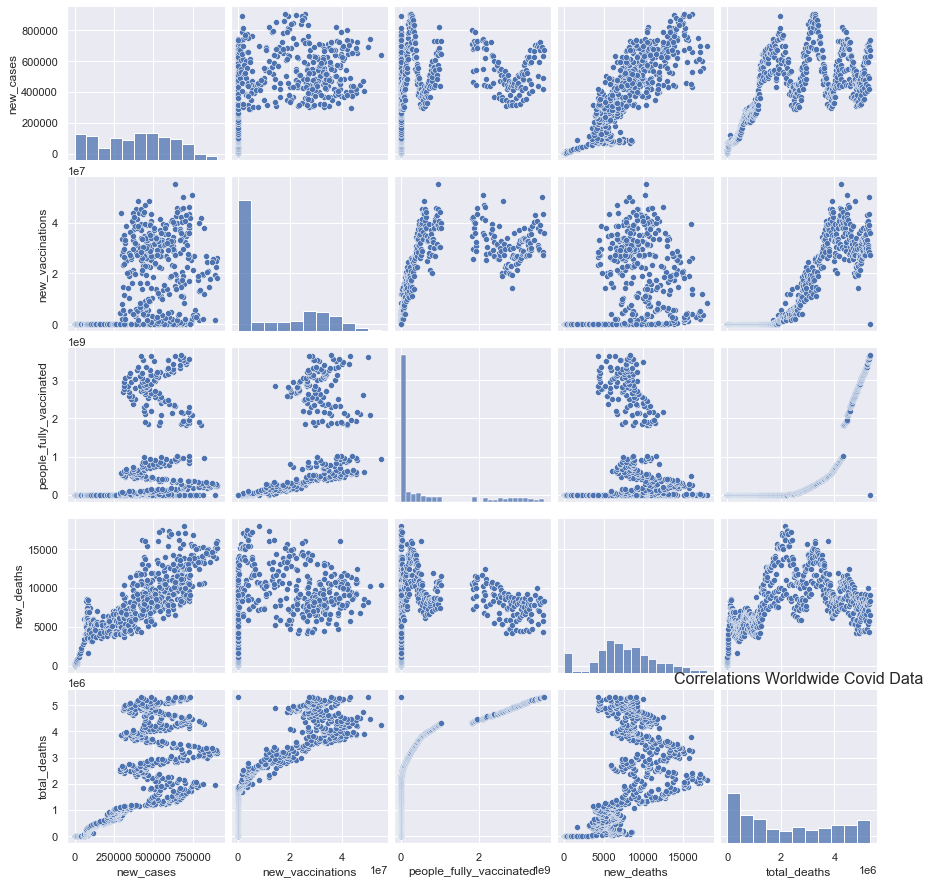

In [9]:
# inspect correlations between variables for the worldwide Covid data 
corr_plot=sns.pairplot(owid_world_c_df.loc[:,owid_world_c_df.dtypes == 'float64'])
fig = corr_plot
plt.title('Correlations Worldwide Covid Data', fontsize=16)
fig.savefig("DC Output/DC Figures/Fig DC Correlations Worldwide Covid Data", dpi='figure',bbox_inches='tight') 

Text(0.5, 1.0, 'Correlations Worldwide Covid Data Heatmap')

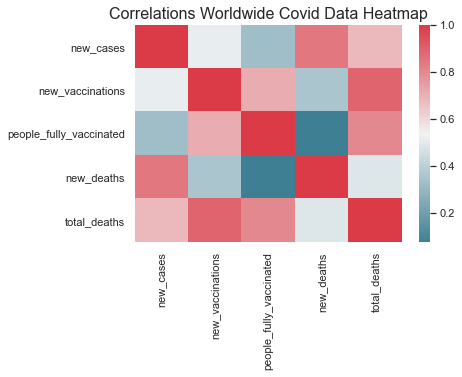

In [10]:
# identify correlations between variables for the worldwide Covid data
corr = owid_world_c_df.loc[:,owid_world_c_df.dtypes == 'float64'].corr()
corr_plot1=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
fig = corr_plot1
plt.title('Correlations Worldwide Covid Data Heatmap', fontsize=16)
#fig.savefig("DC Output/DC Figures/Fig DC Correlations Worldwide Covid Data Heatmap", dpi='figure',bbox_inches='tight') 
#return fig

The r-squared is: 0.2675118134940677


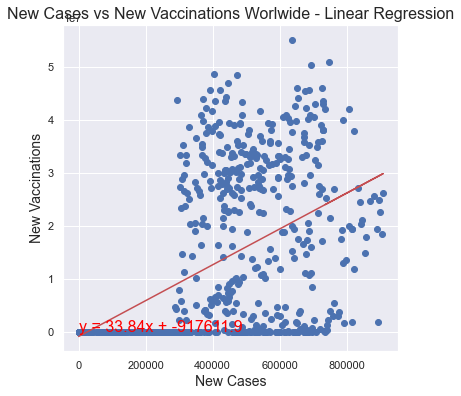

In [11]:
# correlation between new cases and new vaccinations Worldwide
plt.rcParams['figure.figsize'] = [6, 6]
x_values = owid_world_c_df["new_cases"]
y_values = owid_world_c_df["new_vaccinations"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('New Vaccinations', fontsize=14)
plt.title('New Cases vs New Vaccinations Worlwide - Linear Regression', fontsize=16)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs New Vaccinations Worlwide - Linear Regression", dpi='figure',bbox_inches='tight')
plt.show()

The r-squared is: 0.1067361650298845


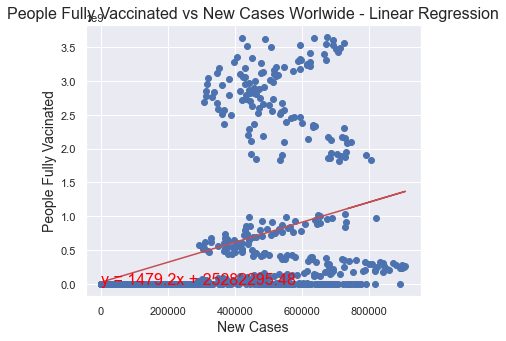

In [12]:
# correlation between new cases and people fully vaccinated
plt.rcParams['figure.figsize'] = [6, 5]
x_values = owid_world_c_df["new_cases"]
y_values = owid_world_c_df["people_fully_vaccinated"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")

plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vacinated', fontsize=14)
plt.title('People Fully Vaccinated vs New Cases Worlwide - Linear Regression', fontsize=16)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Worlwide - Linear Regression", dpi='figure',bbox_inches='tight')
plt.show()

The r-squared is: 0.7134251547294537


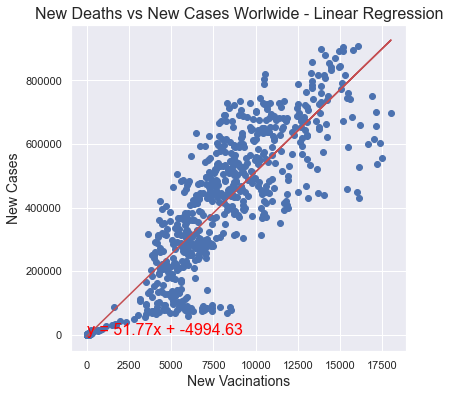

In [13]:
# correlation between new cases and new vaccinations
plt.rcParams['figure.figsize'] = [6, 6]
x_values = owid_world_c_df["new_deaths"]
y_values = owid_world_c_df["new_cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Vacinations', fontsize=14)
plt.ylabel('New Cases', fontsize=14)

plt.title('New Deaths vs New Cases Worlwide - Linear Regression', fontsize=16)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Deaths vs New Cases Worlwide Worlwide - Linear Regression", dpi='figure',bbox_inches='tight')
plt.show()

**Import the vaccinations file 

In [14]:
# import vaccination file
vaccination_path = "country_vaccinations.csv"

vaccination = pd.read_csv(vaccination_path)

vaccination.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://reliefweb.int/sites/reliefweb.int/file...  
1  https://reliefweb.int/sites/reliefweb.int/file...  
2  https://reliefweb.int/sites/reliefweb.int/file...  
3  https://reliefweb.int/sites/reliefweb.int/file...  
4  https://reliefweb.int/sites/reliefweb.int/file...

In [15]:
# format the date column 
vaccination['date'] = pd.to_datetime(vaccination['date'])

In [16]:
# merge the cases and vaccination files by country code and date
cases_vaccination = pd.merge(cases, vaccination, on=['iso_code', 'date'], how='inner')
cases_vaccination.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2021-03-01      52709.0      123.0   
1      AFG      Asia  Afghanistan 2021-04-01      52909.0      200.0   
2      AFG      Asia  Afghanistan 2021-05-01      53011.0      102.0   
3      AFG      Asia  Afghanistan 2021-06-01      53105.0       94.0   
4      AFG      Asia  Afghanistan 2021-07-01      53207.0      102.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0             123.000        2221.0        10.0                9.000  ...   
1             128.857        2230.0         9.0                8.571  ...   
2             123.429        2237.0         7.0                7.857  ...   
3             110.714        2244.0         7.0                7.857  ...   
4             125.286        2253.0         9.0                9.143  ...   

   people_fully_vaccinated_y  daily_vaccinations_raw  daily_vaccinations  \
0                        NaN                     NaN              1580.0   
1                        NaN                     NaN              3000.0   
2                        NaN                     NaN             13921.0   
3                        NaN                     NaN              5102.0   
4                        NaN                     NaN             14115.0   

   total_vaccinations_per_hundred_y  people_vaccinated_per_hundred_y  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   people_fully_vaccinated_per_hundred_y  daily_vaccinations_per_million  \
0                                    NaN                            40.0   
1                                    NaN                            75.0   
2                                    NaN                           349.0   
3                                    NaN                           128.0   
4                                    NaN                           354.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://reliefweb.int/sites/reliefweb.int/file...  
1  https://reliefweb.int/sites/reliefweb.int/file...  
2  https://reliefweb.int/sites/reliefweb.int/file...  
3  https://reliefweb.int/sites/reliefweb.int/file...  
4  https://reliefweb.int/sites/reliefweb.int/file...  

[5 rows x 80 columns]

In [17]:
# export merged dataframe to a CSV file
compression_opts = dict(method='zip',
                        archive_name='DC_cases_vaccines.csv')  
cases_vaccination.to_csv('./DC Output/DC_cases_vaccination_merged.zip', index=False,
          compression=compression_opts)  

In [18]:
# replace NaN values with zero
cases_vaccination = cases_vaccination.replace(np.nan, 0)
cases_vaccination.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2021-03-01      52709.0      123.0   
1      AFG      Asia  Afghanistan 2021-04-01      52909.0      200.0   
2      AFG      Asia  Afghanistan 2021-05-01      53011.0      102.0   
3      AFG      Asia  Afghanistan 2021-06-01      53105.0       94.0   
4      AFG      Asia  Afghanistan 2021-07-01      53207.0      102.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0             123.000        2221.0        10.0                9.000  ...   
1             128.857        2230.0         9.0                8.571  ...   
2             123.429        2237.0         7.0                7.857  ...   
3             110.714        2244.0         7.0                7.857  ...   
4             125.286        2253.0         9.0                9.143  ...   

   people_fully_vaccinated_y  daily_vaccinations_raw  daily_vaccinations  \
0                        0.0                     0.0              1580.0   
1                        0.0                     0.0              3000.0   
2                        0.0                     0.0             13921.0   
3                        0.0                     0.0              5102.0   
4                        0.0                     0.0             14115.0   

   total_vaccinations_per_hundred_y  people_vaccinated_per_hundred_y  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              0.0   
4                               0.0                              0.0   

   people_fully_vaccinated_per_hundred_y  daily_vaccinations_per_million  \
0                                    0.0                            40.0   
1                                    0.0                            75.0   
2                                    0.0                           349.0   
3                                    0.0                           128.0   
4                                    0.0                           354.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name  \
0  World Health Organization   
1  World Health Organization   
2  World Health Organization   
3  World Health Organization   
4  World Health Organization   

                                      source_website  
0  https://reliefweb.int/sites/reliefweb.int/file...  
1  https://reliefweb.int/sites/reliefweb.int/file...  
2  https://reliefweb.int/sites/reliefweb.int/file...  
3  https://reliefweb.int/sites/reliefweb.int/file...  
4  https://reliefweb.int/sites/reliefweb.int/file...  

[5 rows x 80 columns]

In [19]:
# inspect details of the merged dataframe
cases_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61356 entries, 0 to 61355
Data columns (total 80 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    61356 non-null  object        
 1   continent                                   61356 non-null  object        
 2   location                                    61356 non-null  object        
 3   date                                        61356 non-null  datetime64[ns]
 4   total_cases                                 61356 non-null  float64       
 5   new_cases                                   61356 non-null  float64       
 6   new_cases_smoothed                          61356 non-null  float64       
 7   total_deaths                                61356 non-null  float64       
 8   new_deaths                                  61356 non-null  float64       
 9   new_de

In [20]:
# add column for population in millions
cases_vaccination["population_mil"]=cases_vaccination["population"]/1000000

# add new column for calculated vaccinations rate 
cases_vaccination["vaccination_rate"]=cases_vaccination["people_fully_vaccinated_y"]/cases_vaccination["population"]

# find the maximum cases for each country
cases_vaccination['max_cases'] = cases_vaccination.groupby('country')["total_cases"].transform('max')

# find the maximum vaccination for each country
cases_vaccination['max_vaccinated'] = cases_vaccination.groupby('country')["people_fully_vaccinated_y"].transform('max')

# add column for cases % of population
cases_vaccination["cases_per_hundred"]=cases_vaccination["max_cases"]/(cases_vaccination["population"]/100)

# add column for month
cases_vaccination["month"]=cases_vaccination["date"].dt.month

# add column for year
cases_vaccination["year"]=cases_vaccination["date"].dt.year

# add new column for calculated vaccinations rate 
cases_vaccination["vaccination_per_hundred"]=cases_vaccination["max_vaccinated"]/(cases_vaccination["population"]/100)

# add new column for cases per vaccination 
cases_vaccination["cases_per_vaccination"]=cases_vaccination["cases_per_hundred"]/(cases_vaccination["vaccination_per_hundred"])

# add new column for cases per vaccination 
cases_vaccination['max_deaths'] = cases_vaccination.groupby('country')["total_deaths"].transform('max')



In [21]:
# see the list with countries included in the merged dataframe
cases_vaccination.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'EST',
       'SWZ', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS',
       'MEX', '

In [22]:
# exclude rows with description containing OWID_ as country ID
cases_vaccination[cases_vaccination["iso_code"].str.contains("OWID_")==False]

iso_code continent     location       date  total_cases  new_cases  \
0          AFG      Asia  Afghanistan 2021-03-01      52709.0      123.0   
1          AFG      Asia  Afghanistan 2021-04-01      52909.0      200.0   
2          AFG      Asia  Afghanistan 2021-05-01      53011.0      102.0   
3          AFG      Asia  Afghanistan 2021-06-01      53105.0       94.0   
4          AFG      Asia  Afghanistan 2021-07-01      53207.0      102.0   
...        ...       ...          ...        ...          ...        ...   
61351      ZWE    Africa     Zimbabwe 2021-07-12     141601.0     2555.0   
61352      ZWE    Africa     Zimbabwe 2021-08-12     150628.0     9027.0   
61353      ZWE    Africa     Zimbabwe 2021-09-12     155817.0     5189.0   
61354      ZWE    Africa     Zimbabwe 2021-10-12     155817.0        0.0   
61355      ZWE    Africa     Zimbabwe 2021-11-12     165002.0     9185.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 123.000        2221.0        10.0                9.000  ...   
1                 128.857        2230.0         9.0                8.571  ...   
2                 123.429        2237.0         7.0                7.857  ...   
3                 110.714        2244.0         7.0                7.857  ...   
4                 125.286        2253.0         9.0                9.143  ...   
...                   ...           ...         ...                  ...  ...   
61351             996.571        4713.0         3.0                0.857  ...   
61352            2184.429        4720.0         7.0                1.857  ...   
61353            2776.857        4723.0         3.0                2.286  ...   
61354            2625.143        4723.0         0.0                2.143  ...   
61355            3782.714        4735.0        12.0                3.714  ...   

       population_mil  vaccination_rate  max_cases  max_vaccinated  \
0           39.835428          0.000000   157858.0       3566192.0   
1           39.835428          0.000000   157858.0       3566192.0   
2           39.835428          0.000000   157858.0       3566192.0   
3           39.835428          0.000000   157858.0       3566192.0   
4           39.835428          0.000000   157858.0       3566192.0   
...               ...               ...        ...             ...   
61351       15.092171          0.040124   165002.0       2961011.0   
61352       15.092171          0.078200   165002.0       2961011.0   
61353       15.092171          0.000000   165002.0       2961011.0   
61354       15.092171          0.160430   165002.0       2961011.0   
61355       15.092171          0.178009   165002.0       2961011.0   

       cases_per_hundred  month  year  vaccination_per_hundred  \
0               0.396275      3  2021                 8.952312   
1               0.396275      4  2021                 8.952312   
2               0.396275      5  2021                 8.952312   
3               0.396275      6  2021                 8.952312   
4               0.396275      7  2021                 8.952312   
...                  ...    ...   ...                      ...   
61351           1.093295      7  2021                19.619517   
61352           1.093295      8  2021                19.619517   
61353           1.093295      9  2021                19.619517   
61354           1.093295     10  2021                19.619517   
61355           1.093295     11  2021                19.619517   

       cases_per_vaccination  max_deaths  
0                   0.044265      7325.0  
1                   0.044265      7325.0  
2                   0.044265      7325.0  
3                   0.044265      7325.0  
4                   0.044265      7325.0  
...                      ...         ...  
61351               0.055725      4735.0  
61352               0.055725      4735.0  
61353               0.055725      4735.0  
61354               0.055725      4735.0  
61355        

In [23]:
# dataframe for infomation available on 27/11/21
cv_nov = cases_vaccination.loc[(cases_vaccination['date'] == "2021-11-27")]


In [24]:
# sort the November dataframe in a new one sorted by cases per million
dfcv11_per_mil_asc= cv_nov.sort_values('total_cases',ascending=True)
dfcv11_per_mil_asc.head()

iso_code      continent           location       date  total_cases  \
28707      JEY         Europe             Jersey 2021-11-27          0.0   
60606      WLF        Oceania  Wallis and Futuna 2021-11-27          0.0   
33627      MAC           Asia              Macao 2021-11-27          0.0   
27184      IMN         Europe        Isle of Man 2021-11-27          0.0   
1800       AIA  North America           Anguilla 2021-11-27          0.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
28707        0.0                 0.0           0.0         0.0   
60606        0.0                 0.0           0.0         0.0   
33627        0.0                 0.0           0.0         0.0   
27184        0.0                 0.0           0.0         0.0   
1800         0.0                 0.0           0.0         0.0   

       new_deaths_smoothed  ...  population_mil  vaccination_rate  max_cases  \
28707                  0.0  ...        0.101073               0.0        0.0   
60606                  0.0  ...        0.011094               0.0        0.0   
33627                  0.0  ...        0.658391               0.0        0.0   
27184                  0.0  ...        0.085410               0.0        0.0   
1800                   0.0  ...        0.015125               0.0        0.0   

       max_vaccinated  cases_per_hundred  month  year  \
28707         75778.0                0.0     11  2021   
60606          5923.0                0.0     11  2021   
33627        448433.0                0.0     11  2021   
27184         65034.0                0.0     11  2021   
1800           9223.0                0.0     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
28707                74.973534                    0.0         0.0  
60606                53.389219                    0.0         0.0  
33627                68.110439                    0.0         0.0  
27184                76.143309                    0.0         0.0  
1800                 60.978512                    0.0         0.0  

[5 rows x 90 columns]

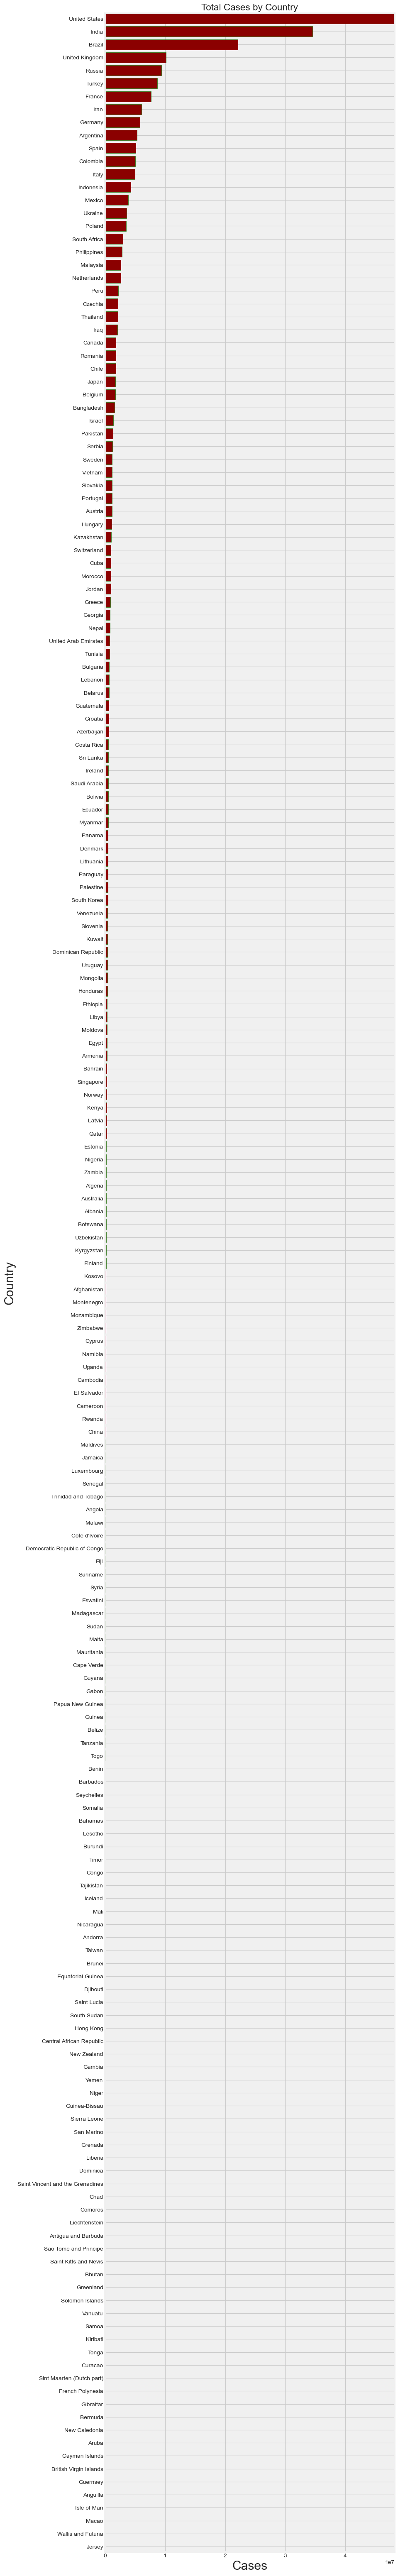

In [25]:
# bar plot cases by country

plt.figure(figsize=(10,90), dpi=90)

plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.barh('country', 'total_cases',data=dfcv11_per_mil_asc,edgecolor="green", facecolor="darkred")
plt.xlabel("Cases", size=24)
plt.ylabel("Country", size=24)
plt.margins(x=0, y=0)
plt.title("Total Cases by Country", size=18)

plt.savefig("DC Output/DC Figures/Fig DC Total Cases by Country.png",bbox_inches='tight')

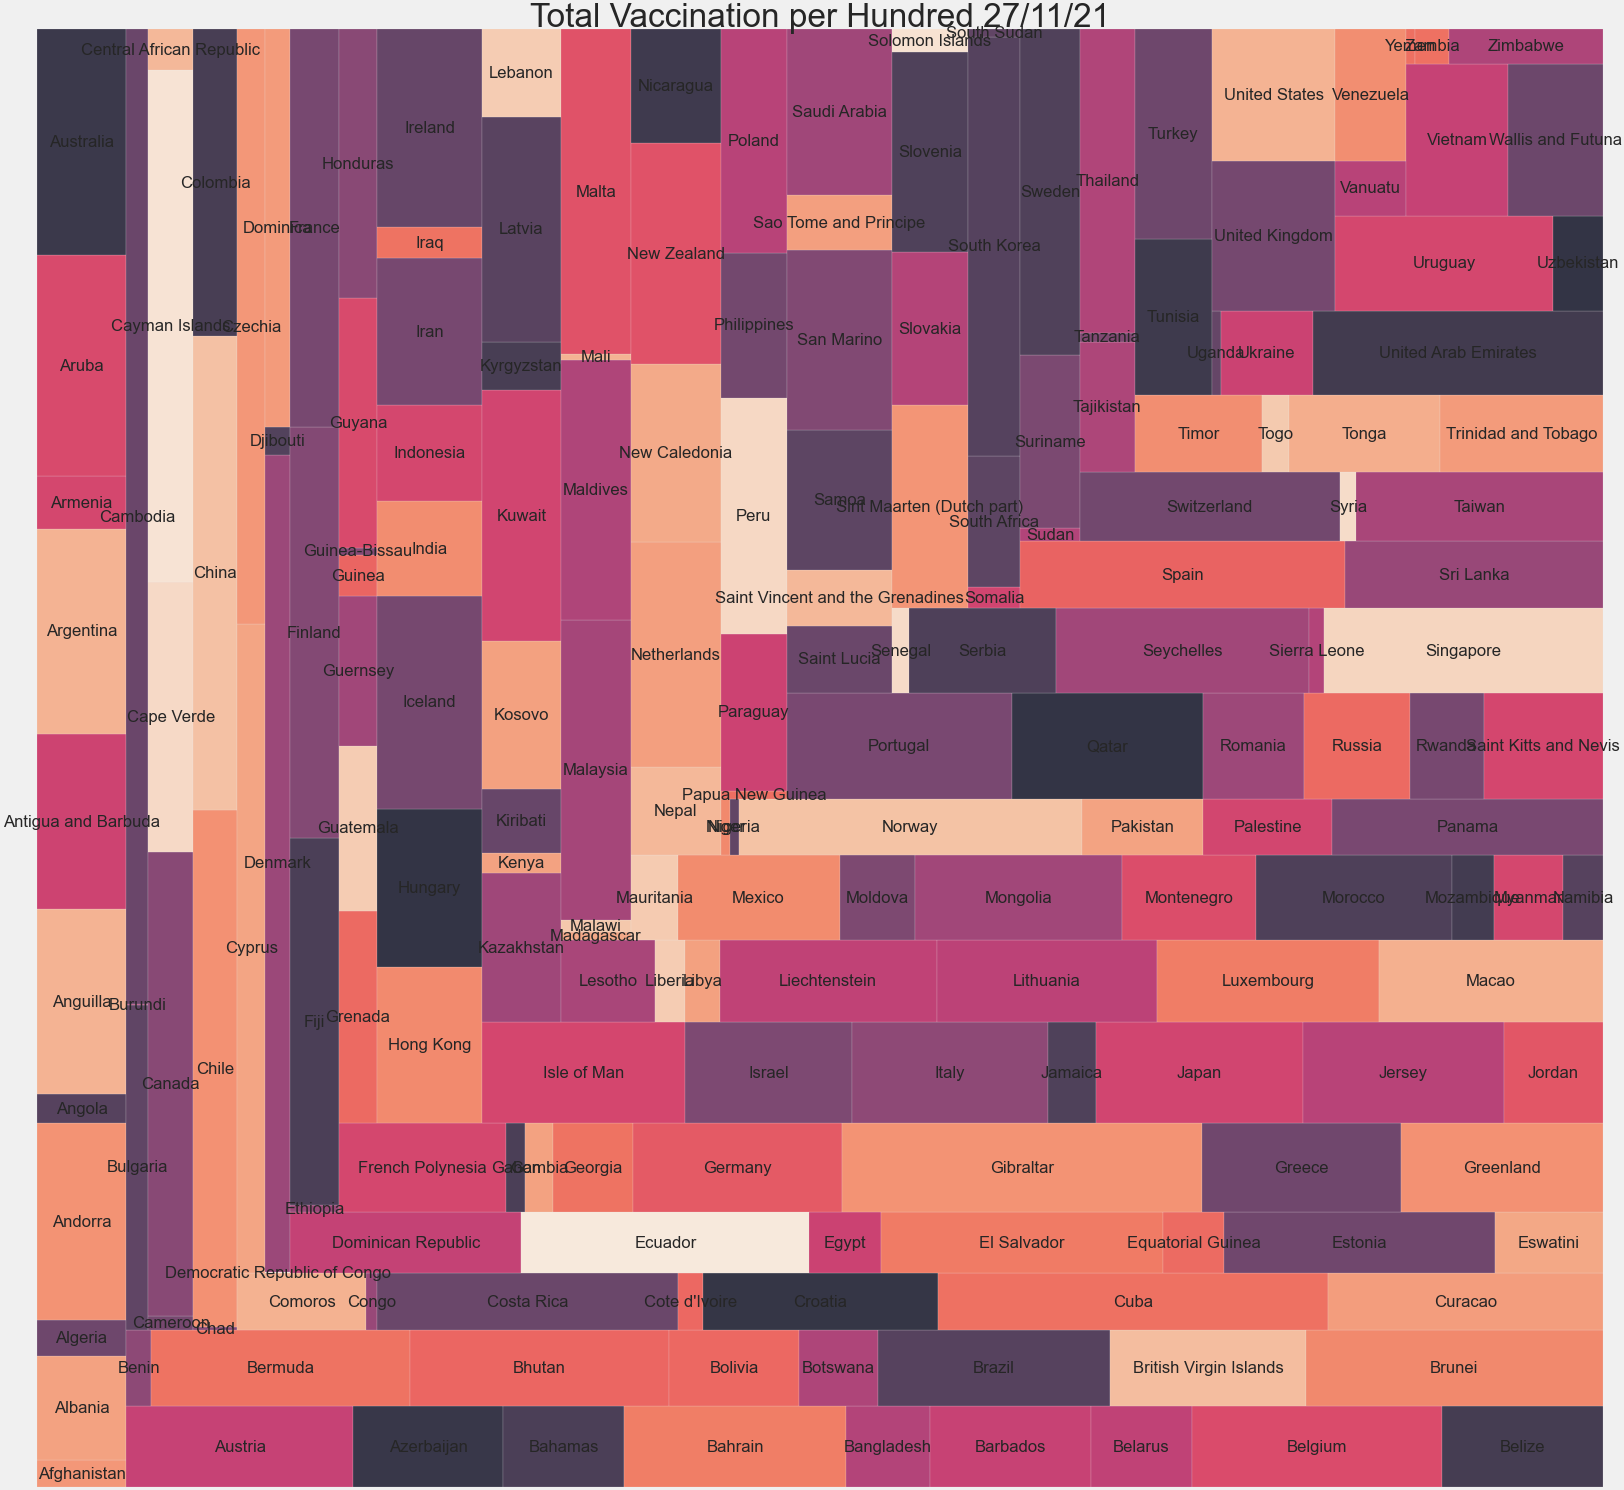

In [26]:
# use a treemap to vizualise the vaccination per hundred for all countries worlwide

plt.figure(figsize=(60, 60), dpi=30)
plt.title('Total Vaccination per Hundred 27/11/21', fontsize=80)

plt.rc('font', size=40) 

squarify.plot(sizes=cv_nov["vaccination_per_hundred"], label=cv_nov["location"], alpha=.8)

plt.axis('off')
plt.savefig("DC Output/DC Figures/Fig DC Total Vaccination per Hundred 271121", dpi='figure', bbox_inches="tight")
plt.show()


In [27]:
#10 countries with the largest number of cases
c10 = cv_nov.nlargest(10, ['max_cases'])
c10[["country", "date", "max_cases"]]

# max cases reflect data from 11/12/21

country       date   max_cases
59078   United States 2021-11-27  49884847.0
25605           India 2021-11-27  34690510.0
8171           Brazil 2021-11-27  22177059.0
58714  United Kingdom 2021-11-27  10833033.0
46061          Russia 2021-11-27   9812538.0
56905          Turkey 2021-11-27   9024193.0
19513          France 2021-11-27   8318995.0
20959         Germany 2021-11-27   6528894.0
26240            Iran 2021-11-27   6152524.0
2436        Argentina 2021-11-27   5356885.0

In [28]:
#10 countries with the largest total cases
c10t = cv_nov.nlargest(10, ['total_cases'])
c10t

iso_code      continent        location       date  total_cases  \
59078      USA  North America   United States 2021-11-27   48204567.0   
25605      IND           Asia           India 2021-11-27   34572523.0   
8171       BRA  South America          Brazil 2021-11-27   22076863.0   
58714      GBR         Europe  United Kingdom 2021-11-27   10165779.0   
46061      RUS         Europe          Russia 2021-11-27    9370694.0   
56905      TUR           Asia          Turkey 2021-11-27    8726370.0   
19513      FRA         Europe          France 2021-11-27    7691217.0   
26240      IRN           Asia            Iran 2021-11-27    6105101.0   
20959      DEU         Europe         Germany 2021-11-27    5780814.0   
2436       ARG  South America       Argentina 2021-11-27    5325560.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
59078    24738.0           71690.857      777025.0       208.0   
25605     8774.0            8872.857      468554.0       621.0   
8171      9233.0            9244.714      614186.0       229.0   
58714    39834.0           44017.286      145167.0       131.0   
46061    33119.0           33649.286      266337.0      1203.0   
56905    23759.0           24860.429       76233.0       192.0   
19513    37089.0           27615.000      119850.0        32.0   
26240     3045.0            4571.857      129549.0        87.0   
20959    44977.0           58052.571      100887.0       104.0   
2436      1521.0            1551.143      116517.0        12.0   

       new_deaths_smoothed  ...  population_mil  vaccination_rate   max_cases  \
59078              749.714  ...      332.915074          0.590039  49884847.0   
25605              413.143  ...     1393.409033          0.309613  34690510.0   
8171               228.429  ...      213.993441          0.619959  22177059.0   
58714              122.714  ...       68.207114          0.678985  10833033.0   
46061             1206.571  ...      145.912022          0.383552   9812538.0   
56905              198.000  ...       85.042736          0.591816   9024193.0   
19513               63.286  ...       67.564251          0.695710   8318995.0   
26240               99.571  ...       85.028760          0.544855   6152524.0   
20959              260.000  ...       83.900471          0.679443   6528894.0   
2436                20.429  ...       45.605823          0.641066   5356885.0   

       max_vaccinated  cases_per_hundred  month  year  \
59078     200145430.0          14.984256     11  2021   
25605     512106250.0           2.489614     11  2021   
8171      139389518.0          10.363429     11  2021   
58714      46705196.0          15.882556     11  2021   
46061      60962126.0           6.724969     11  2021   
56905      50896427.0          10.611363     11  2021   
19513      47838675.0          12.312717     11  2021   
26240      48149791.0           7.235815     11  2021   
20959      57811831.0           7.781713     11  2021   
2436       30872617.0          11.746055     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
59078                60.119065               0.249243    797179.0  
25605                36.752040               0.067741    475434.0  
8171                 65.137285               0.159101    616457.0  
58714                68.475549               0.231945    146844.0  
46061                41.780057               0.160961    282713.0  
56905                59.848059               0.177305     78969.0  
19513                70.804714               0.173897    121368.0  
26240                56.627653               0.127779    130661.0  
20959                68.905252               0.112934    105642.0  
2436                 67.694463               0.173516    116760.0  

[10 rows x 90 columns]

In [29]:
#10 countries with the highest number of cases per million
c10m = cv_nov.nlargest(10, ['total_cases_per_million'])
c10m[["country", "date", "total_cases_per_million", "total_cases", "population"]]

country       date  total_cases_per_million  total_cases  population
37327  Montenegro 2021-11-27               249355.546     156608.0    628051.0
49337  Seychelles 2021-11-27               234526.337      23197.0     98910.0
1219      Andorra 2021-11-27               216045.712      16712.0     77354.0
20613     Georgia 2021-11-27               209887.850     835306.0   3979773.0
50456    Slovakia 2021-11-27               209325.280    1143068.0   5460726.0
50805    Slovenia 2021-11-27               200073.795     415898.0   2078723.0
14756     Czechia 2021-11-27               196770.346    2110274.0  10724553.0
49011      Serbia 2021-11-27               181723.126    1248719.0   6871547.0
47778  San Marino 2021-11-27               174360.482       5930.0     34010.0
32991   Lithuania 2021-11-27               173469.122     466608.0   2689862.0

In [30]:
#10 countries with the highest number of cases 
c10 = cv_nov.nlargest(10, ['total_cases'])
c10[["country", "date", "total_cases", "total_cases", "population", "max_cases"]]

country       date  total_cases  total_cases    population  \
59078   United States 2021-11-27   48204567.0   48204567.0  3.329151e+08   
25605           India 2021-11-27   34572523.0   34572523.0  1.393409e+09   
8171           Brazil 2021-11-27   22076863.0   22076863.0  2.139934e+08   
58714  United Kingdom 2021-11-27   10165779.0   10165779.0  6.820711e+07   
46061          Russia 2021-11-27    9370694.0    9370694.0  1.459120e+08   
56905          Turkey 2021-11-27    8726370.0    8726370.0  8.504274e+07   
19513          France 2021-11-27    7691217.0    7691217.0  6.756425e+07   
26240            Iran 2021-11-27    6105101.0    6105101.0  8.502876e+07   
20959         Germany 2021-11-27    5780814.0    5780814.0  8.390047e+07   
2436        Argentina 2021-11-27    5325560.0    5325560.0  4.560582e+07   

        max_cases  
59078  49884847.0  
25605  34690510.0  
8171   22177059.0  
58714  10833033.0  
46061   9812538.0  
56905   9024193.0  
19513   8318995.0  
26240   6152524.0  
20959   6528894.0  
2436    5356885.0

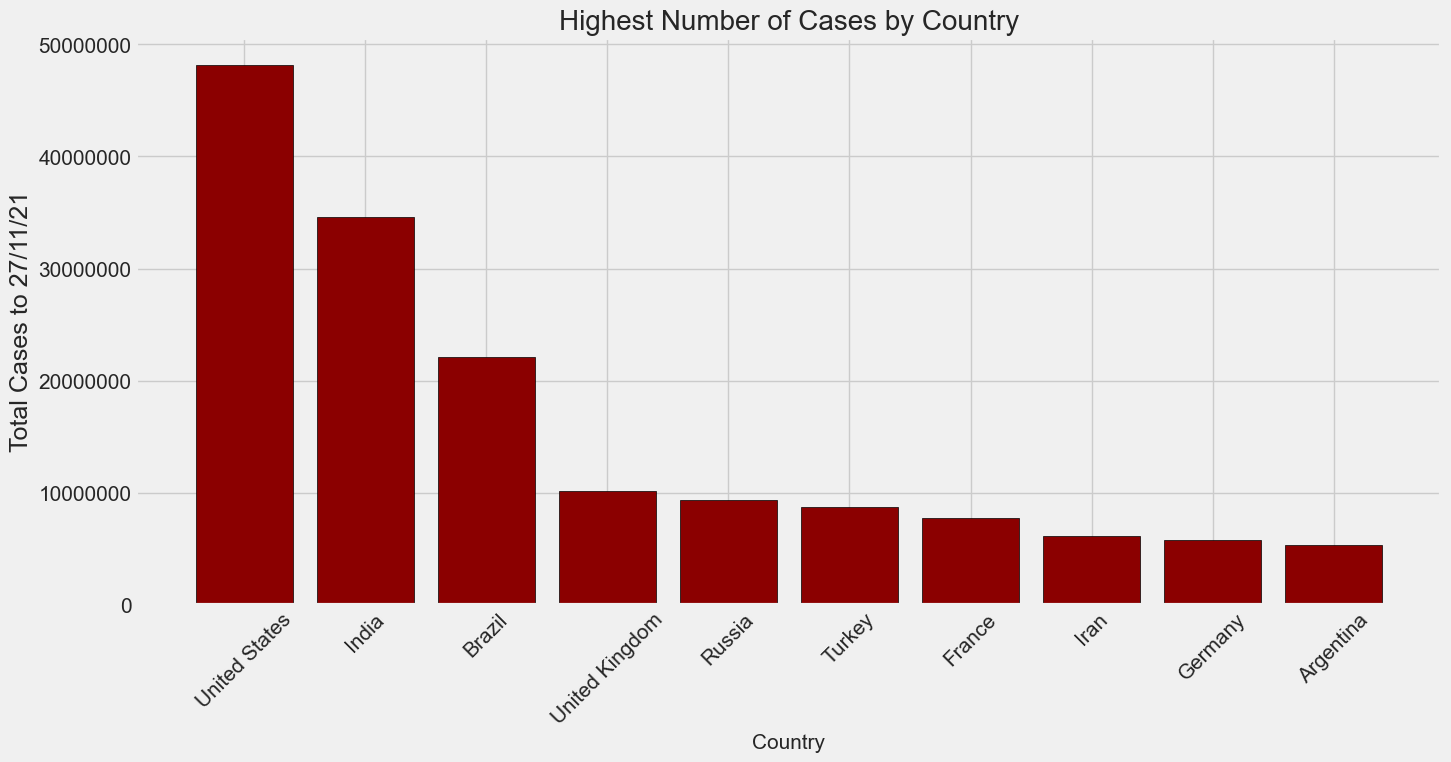

In [31]:
# plot 10 countries with the highest number of cases 

plt.figure(figsize=(15, 7), dpi=100)
plt.bar(c10t["country"],c10t["total_cases"],edgecolor="black", facecolor="darkred")
plt.xlabel("Country",fontsize=15)
plt.ylabel("Total Cases to 27/11/21", fontsize=18)
plt.title("Highest Number of Cases by Country", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.savefig("DC Output/DC Figures/Fig DC Highest Number of Cases by Country.png", bbox_inches="tight")
plt.show()

In [32]:
#10 countries with the largest number of people vaccinated
v10t = cv_nov.nlargest(10, ['people_vaccinated_x'])
v10t[["date", "country", "people_vaccinated_x", "people_fully_vaccinated_x"]]



date        country  people_vaccinated_x  \
25605 2021-11-27          India          781075743.0   
59078 2021-11-27  United States          234640088.0   
8171  2021-11-27         Brazil          163607249.0   
25938 2021-11-27      Indonesia          138530231.0   
36194 2021-11-27         Mexico           76480431.0   
60376 2021-11-27        Vietnam           69747303.0   
46061 2021-11-27         Russia           66011769.0   
20959 2021-11-27        Germany           59351299.0   
4837  2021-11-27     Bangladesh           57817590.0   
26240 2021-11-27           Iran           57332853.0   

       people_fully_vaccinated_x  
25605                431417303.0  
59078                196475137.0  
8171                 132667094.0  
25938                 94339737.0  
36194                 64830452.0  
60376                        0.0  
46061                 55964877.0  
20959                 57025634.0  
4837                  35969066.0  
26240                 46328337.0

In [33]:
#10 countries with the largest number of people fully vaccinated per hundred
v10fvph = cv_nov.nlargest(10, ['people_fully_vaccinated_per_hundred_y'])
v10fvph[["country", "people_fully_vaccinated_per_hundred_y"]]



country  people_fully_vaccinated_per_hundred_y
21553             Gibraltar                                 118.19
58379  United Arab Emirates                                  89.34
11403                 Chile                                  83.82
35281                 Malta                                  83.72
13843                  Cuba                                  81.24
51883           South Korea                                  79.77
9460               Cambodia                                  78.37
8583                 Brunei                                  77.51
34391              Malaysia                                  77.46
15363               Denmark                                  76.54

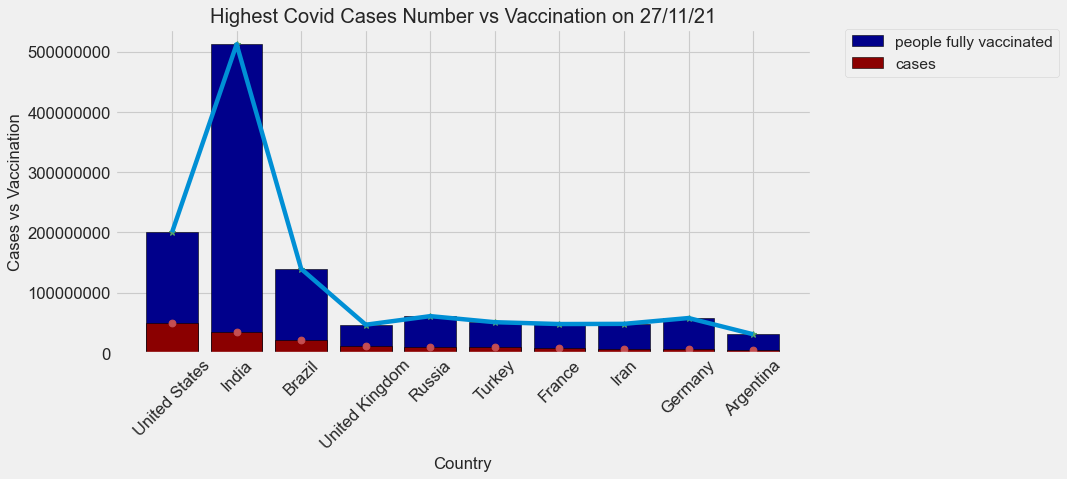

In [34]:
# plot the maximum cases by country and save the figure in a png file

plt.figure(figsize=(10, 5), dpi=80)


plt.bar(c10["country"],c10["max_vaccinated"], edgecolor="black",color="darkblue", label="people fully vaccinated")
plt.bar(c10["country"],c10["max_cases"],edgecolor="black", facecolor="darkred", label="cases")
plt.plot(c10["country"],c10["max_vaccinated"],'g*')
plt.plot(c10["country"],c10["max_cases"],'ro')
plt.plot(c10["country"],c10["max_vaccinated"])

#plt.plot(c10["country"],c10["gdp_per_capita"],'ks')
plt.xlabel("Country",fontsize=15)
plt.ylabel("Cases vs Vaccination", fontsize=15)
plt.title("Highest Covid Cases Number vs Vaccination on 27/11/21", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='14', title = "",  title_fontsize = "22")

plt.savefig("DC Output/DC Figures/Fig DC Max Cases vs Vaccination.png", bbox_inches="tight")

plt.show()





In [35]:
#10 countries with the largest number of fully vaccinated people
v10 = cv_nov.nlargest(10, ['max_vaccinated'])
v10

iso_code      continent       location       date  total_cases  \
11764      CHN           Asia          China 2021-11-27      98708.0   
25605      IND           Asia          India 2021-11-27   34572523.0   
59078      USA  North America  United States 2021-11-27   48204567.0   
8171       BRA  South America         Brazil 2021-11-27   22076863.0   
25938      IDN           Asia      Indonesia 2021-11-27    4255672.0   
28466      JPN           Asia          Japan 2021-11-27    1726419.0   
36194      MEX  North America         Mexico 2021-11-27    3879836.0   
46061      RUS         Europe         Russia 2021-11-27    9370694.0   
20959      DEU         Europe        Germany 2021-11-27    5780814.0   
60376      VNM           Asia        Vietnam 2021-11-27    1197404.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
11764       23.0              23.429        4636.0         0.0   
25605     8774.0            8872.857      468554.0       621.0   
59078    24738.0           71690.857      777025.0       208.0   
8171      9233.0            9244.714      614186.0       229.0   
25938      404.0             367.714      143807.0        11.0   
28466      120.0             100.571       18354.0         1.0   
36194        0.0            3000.714      293614.0         0.0   
46061    33119.0           33649.286      266337.0      1203.0   
20959    44977.0           58052.571      100887.0       104.0   
60376    16067.0           16111.286       24692.0       148.0   

       new_deaths_smoothed  ...  population_mil  vaccination_rate   max_cases  \
11764                0.000  ...     1444.216102          0.000000     99756.0   
25605              413.143  ...     1393.409033          0.309613  34690510.0   
59078              749.714  ...      332.915074          0.590039  49884847.0   
8171               228.429  ...      213.993441          0.619959  22177059.0   
25938               11.286  ...      276.361788          0.341363   4258980.0   
28466                1.571  ...      126.050796          0.000000   1727925.0   
36194              209.857  ...      130.262220          0.497692   3914706.0   
46061             1206.571  ...      145.912022          0.383552   9812538.0   
20959              260.000  ...       83.900471          0.679443   6528894.0   
60376              143.857  ...       98.168829          0.499355   1398413.0   

       max_vaccinated  cases_per_hundred  month  year  \
11764    1.125000e+09           0.006907     11  2021   
25605    5.121062e+08           2.489614     11  2021   
59078    2.001454e+08          14.984256     11  2021   
8171     1.393895e+08          10.363429     11  2021   
25938    1.024453e+08           1.541089     11  2021   
28466    9.794168e+07           1.370816     11  2021   
36194    6.600338e+07           3.005250     11  2021   
46061    6.096213e+07           6.724969     11  2021   
20959    5.781183e+07           7.781713     11  2021   
60376    5.638520e+07           1.424498     11  2021   

       vaccination_per_hundred  cases_per_vaccination  max_deaths  
11764                77.896930               0.000089      4639.0  
25605                36.752040               0.067741    475434.0  
59078                60.119065               0.249243    797179.0  
8171                 65.137285               0.159101    616457.0  
25938                37.069255               0.041573    143929.0  
28466                77.700169               0.017642     18369.0  
36194                50.669629               0.059311    296385.0  
46061                41.780057               0.160961    282713.0  
20959                68.905252               0.112934    105642.0  
60376                57.436966               0.024801     27611.0  

[10 rows x 90 columns]

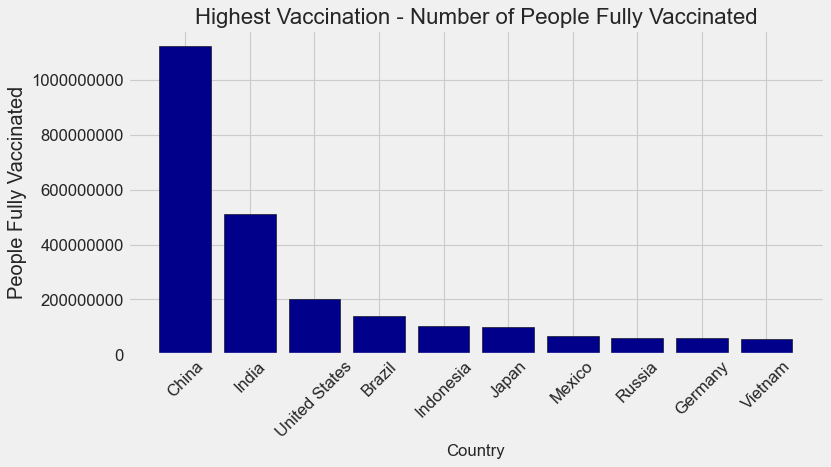

In [36]:
# plot the maximum vaccination by country and save the figure in a png file

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(v10["country"],v10["max_vaccinated"],edgecolor="black", facecolor="darkblue")
plt.xlabel("Country",fontsize=15)
plt.ylabel("People Fully Vaccinated", fontsize=18)
plt.title("Highest Vaccination - Number of People Fully Vaccinated", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.savefig("DC Output/DC Figures/Fig DC Max Vaccination.png", bbox_inches="tight")
plt.show()

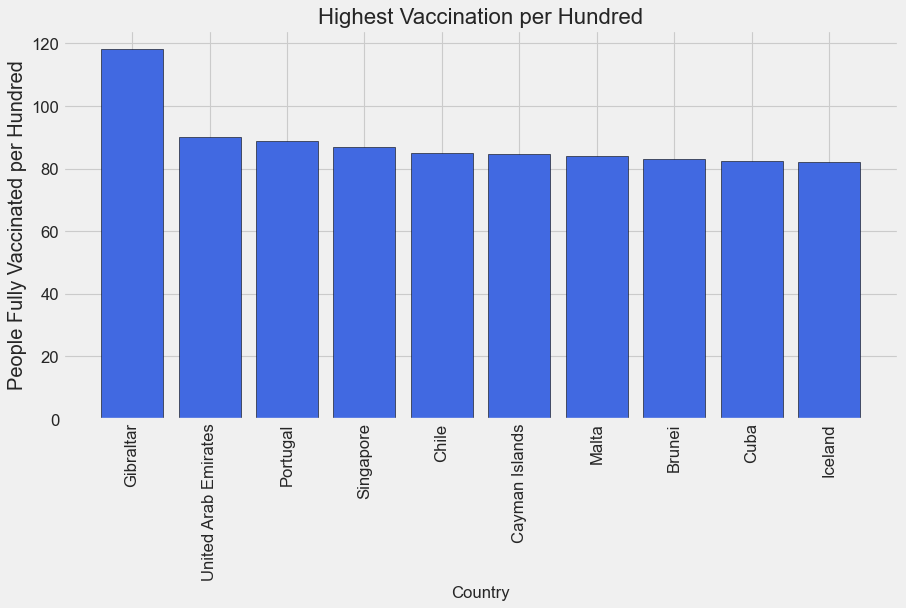

In [37]:
# plot the maximum vaccination per hundrdd by country and save the figure in a png file

v10perhundred = cv_nov.nlargest(10, ['vaccination_per_hundred'])

plt.figure(figsize=(12, 6), dpi=80)
plt.bar(v10perhundred["country"],v10perhundred["vaccination_per_hundred"],edgecolor="black", facecolor="royalblue")
plt.xlabel("Country",fontsize=15)
plt.ylabel("People Fully Vaccinated per Hundred", fontsize=18)
plt.title("Highest Vaccination per Hundred", fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.savefig("DC Output/DC Figures/Fig DC Highest Vaccination per Hundred.png", bbox_inches="tight")
plt.show()

In [38]:
# find the total number of countries with more than 100,000 cases to date (27/11/21), GDP higher than 30000 
#and human development index hgher than 0.8
chigh=cv_nov.loc[(cv_nov['max_cases'] > 100000)&(cv_nov['gdp_per_capita'] > 30000)&(cv_nov['human_development_index'] > 0.8)]
print(chigh.count())
chigh

iso_code                   30
continent                  30
location                   30
date                       30
total_cases                30
                           ..
month                      30
year                       30
vaccination_per_hundred    30
cases_per_vaccination      30
max_deaths                 30
Length: 90, dtype: int64


iso_code      continent              location       date  total_cases  \
3213       AUS        Oceania             Australia 2021-11-27     207984.0   
3560       AUT         Europe               Austria 2021-11-27    1132805.0   
4516       BHR           Asia               Bahrain 2021-11-27     277552.0   
5822       BEL         Europe               Belgium 2021-11-27    1701633.0   
10062      CAN  North America                Canada 2021-11-27    1792561.0   
14407      CYP         Europe                Cyprus 2021-11-27     131951.0   
14756      CZE         Europe               Czechia 2021-11-27    2110274.0   
15363      DNK         Europe               Denmark 2021-11-27     474637.0   
19165      FIN         Europe               Finland 2021-11-27     182284.0   
19513      FRA         Europe                France 2021-11-27    7691217.0   
20959      DEU         Europe               Germany 2021-11-27    5780814.0   
26869      IRL         Europe               Ireland 2021-11-27     556319.0   
27541      ISR           Asia                Israel 2021-11-27    1341881.0   
27891      ITA         Europe                 Italy 2021-11-27    4994891.0   
28466      JPN           Asia                 Japan 2021-11-27    1726419.0   
30388      KWT           Asia                Kuwait 2021-11-27     413266.0   
39511      NLD         Europe           Netherlands 2021-11-27    2618592.0   
41901      NOR         Europe                Norway 2021-11-27     259200.0   
45351      QAT           Asia                 Qatar 2021-11-27     242979.0   
48384      SAU           Asia          Saudi Arabia 2021-11-27     549671.0   
49933      SGP           Asia             Singapore 2021-11-27     261636.0   
50456      SVK         Europe              Slovakia 2021-11-27    1143068.0   
50805      SVN         Europe              Slovenia 2021-11-27     415898.0   
51883      KOR           Asia           South Korea 2021-11-27     440896.0   
52467      ESP         Europe                 Spain 2021-11-27    5131012.0   
53694      SWE         Europe                Sweden 2021-11-27    1198848.0   
54048      CHE         Europe           Switzerland 2021-11-27     986834.0   
58379      ARE           Asia  United Arab Emirates 2021-11-27     741858.0   
58714      GBR         Europe        United Kingdom 2021-11-27   10165779.0   
59078      USA  North America         United States 2021-11-27   48204567.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
3213      1235.0            1363.143        1994.0         4.0   
3560     11671.0           12890.571       12349.0        65.0   
4516        16.0              29.143        1394.0         0.0   
5822         0.0           17161.857       26840.0         0.0   
10062     1982.0            2868.143       29681.0        10.0   
14407        0.0             294.714         591.0         0.0   
14756    20417.0           18489.286       32744.0       101.0   
15363     3744.0            3994.429        2863.0        13.0   
19165        0.0            1065.857        1309.0         0.0   
19513    37089.0           27615.000      119850.0        32.0   
20959    44977.0           58052.571      100887.0       104.0   
26869     4791.0            4505.143        5652.0         0.0   
27541      340.0             256.714        8184.0         2.0   
27891    12869.0           11272.857      133627.0        90.0   
28466      120.0             100.571       18354.0         1.0   
30388       21.0              20.857        2465.0         0.0   
39511    22071.0           22313.286       19721.0        55.0   
41901     1891.0            2537.000        1050.0         0.0   
45351      155.0             144.286         611.0         0.0   
48384       29.0              32.571        8832.0         2.0   
49933     1761.0            1588.286         690.0         6.0   
50456    11862.0           11198.286       14228.0        51.0   
50805     2234.0            2494.143  

In [39]:
# export merged dataframe to a CSV file
compression_opts = dict(method='zip',
                        archive_name='DC_high_cases.csv')  
chigh.to_csv('./DC Output/DC_high_cases.zip', index=False,
          compression=compression_opts)  

In [40]:
# select a sample of 10 countries with more than 100000 cases, GDP higher than 30000 
#and human development index hgher than 0.8
dfsample = chigh.sample(frac=0.35)
print(dfsample.count())
print(dfsample["location"])


iso_code                   10
continent                  10
location                   10
date                       10
total_cases                10
                           ..
month                      10
year                       10
vaccination_per_hundred    10
cases_per_vaccination      10
max_deaths                 10
Length: 90, dtype: int64
14407                  Cyprus
53694                  Sweden
51883             South Korea
54048             Switzerland
19165                 Finland
58714          United Kingdom
14756                 Czechia
59078           United States
58379    United Arab Emirates
50805                Slovenia
Name: location, dtype: object


selected sample

49933      Singapore
19513         France
50805       Slovenia
3213       Australia
20959        Germany
26869        Ireland
54048    Switzerland
41901         Norway
53694         Sweden
27541         Israel

In [41]:
# 10 countries from the selected sample (number of cases to 27/11/21 higher than 100,000)
countries_sample=["Singapore","France","Slovenia","Australia","Germany","Ireland","Switzerland","Norway","Sweden","Israel"]

In [42]:
c10 = cases_vaccination[cases_vaccination["location"].isin(countries_sample)]

In [43]:
c10

iso_code continent     location       date  total_cases  new_cases  \
2932       AUS   Oceania    Australia 2021-03-01      28504.0       20.0   
2933       AUS   Oceania    Australia 2021-04-01      28517.0       13.0   
2934       AUS   Oceania    Australia 2021-05-01      28536.0       19.0   
2935       AUS   Oceania    Australia 2021-06-01      28546.0       10.0   
2936       AUS   Oceania    Australia 2021-07-01      28571.0       25.0   
...        ...       ...          ...        ...          ...        ...   
54058      CHE    Europe  Switzerland 2021-07-12    1078503.0     9975.0   
54059      CHE    Europe  Switzerland 2021-08-12    1090928.0    12425.0   
54060      CHE    Europe  Switzerland 2021-09-12    1101789.0    10861.0   
54061      CHE    Europe  Switzerland 2021-10-12    1111923.0    10134.0   
54062      CHE    Europe  Switzerland 2021-11-12    1111923.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
2932               23.857         909.0         0.0                0.000  ...   
2933               24.000         909.0         0.0                0.000  ...   
2934               22.143         909.0         0.0                0.000  ...   
2935               20.143         909.0         0.0                0.000  ...   
2936               20.857         909.0         0.0                0.000  ...   
...                   ...           ...         ...                  ...  ...   
54058            9120.143       11661.0        36.0               19.857  ...   
54059            9399.857       11684.0        23.0               19.429  ...   
54060            9587.714       11716.0        32.0               21.429  ...   
54061            9612.857       11746.0        30.0               22.143  ...   
54062            9612.857       11748.0         2.0               22.714  ...   

       population_mil  vaccination_rate  max_cases  max_vaccinated  \
2932        25.788217      4.653288e-07   228925.0      19262415.0   
2933        25.788217      3.072876e-03   228925.0      19262415.0   
2934        25.788217      1.008255e-02   228925.0      19262415.0   
2935        25.788217      2.098303e-02   228925.0      19262415.0   
2936        25.788217      6.694038e-02   228925.0      19262415.0   
...               ...               ...        ...             ...   
54058        8.715494      4.353469e-01  1111923.0       5748798.0   
54059        8.715494      5.190577e-01  1111923.0       5748798.0   
54060        8.715494      5.540540e-01  1111923.0       5748798.0   
54061        8.715494      6.045475e-01  1111923.0       5748798.0   
54062        8.715494      6.466597e-01  1111923.0       5748798.0   

       cases_per_hundred  month  year  vaccination_per_hundred  \
2932            0.887712      3  2021                74.694637   
2933            0.887712      4  2021                74.694637   
2934            0.887712      5  2021                74.694637   
2935            0.887712      6  2021                74.694637   
2936            0.887712      7  2021                74.694637   
...                  ...    ...   ...                      ...   
54058          12.758003      7  2021                65.960667   
54059          12.758003      8  2021                65.960667   
54060          12.758003      9  2021                65.960667   
54061          12.758003     10  2021                65.960667   
54062          12.758003     11  2021                65.960667   

       cases_per_vaccination  max_deaths  
2932                0.011885      2104.0  
2933                0.011885      2104.0  
2934                0.011885      2104.0  
2935                0.011885      2104.0  
2936                0.011885      2104.0  
...                      ...         ...  
54058               0.193418     11748.0  
54059               0.193418     11748.0  
54060               0.193418     11748.0  
54061               0.193418     11748.0  
54062        

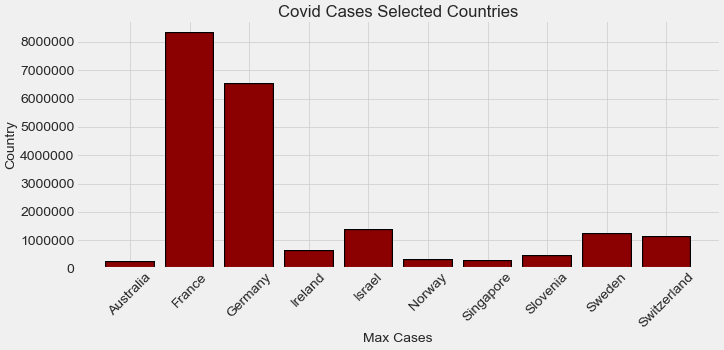

In [44]:
# plot the maximum cases by country and save the figure in a png file

plt.figure(figsize=(15, 8), dpi=50)
plt.bar(c10["country"],c10["max_cases"],edgecolor="black", facecolor="darkred")
plt.xlabel("Max Cases",fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.title("Covid Cases Selected Countries", fontsize=24)
plt.xticks(rotation=45, fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.yticks(size = 20)
plt.grid(True)
plt.savefig("DC Output/DC Figures/Fig DC Max Cases Selected Countries.png")
plt.show()

In [45]:
c10d = cases_vaccination.loc[(        (cases_vaccination['country'] == "Singapore")|
                                      (cases_vaccination['country'] == "France") |
                                      (cases_vaccination['country'] == "Slovenia")|
                                      (cases_vaccination['country'] == "Australia")| 
                                      (cases_vaccination['country'] == "Germany")|
                                      (cases_vaccination['country'] == "Ireland")|
                                      (cases_vaccination['country'] == "Switzerland") |
                                      (cases_vaccination['country'] == "Norway")|  
                                      (cases_vaccination['country'] == "Sweden")|
                                      (cases_vaccination['country'] == "Israel"))& 
                                      ((cases_vaccination['year'] != "2020")& 
                                       (cases_vaccination['month'] != "12")&
                                      (cases_vaccination['new_cases'] >= 0))]


In [46]:
c10d.describe()

total_cases      new_cases  new_cases_smoothed   total_deaths  \
count  3.434000e+03    3434.000000         3434.000000    3434.000000   
mean   1.283910e+06    4332.144438         4250.025745   23111.314502   
std    1.865292e+06    9364.161873         7977.968114   36636.667311   
min    7.020000e+02       0.000000            4.000000       0.000000   
25%    1.659780e+05     174.500000          395.642500     967.750000   
50%    4.952280e+05     999.500000         1172.285500    5517.500000   
75%    1.153463e+06    3671.250000         3950.286000   14629.750000   
max    8.318995e+06  117902.000000        58134.429000  121368.000000   

        new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  3434.000000          3434.000000              3434.000000   
mean     46.429237            46.746790             63837.496282   
std     129.296467           113.833731             42624.114601   
min     -87.000000            -0.429000               128.439000   
25%       0.000000             1.286000             26006.847250   
50%       5.000000             6.571000             59816.163000   
75%      25.000000            26.000000             95332.464750   
max    1734.000000           894.429000            211268.649000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count            3434.000000                     3434.000000   
mean              223.245988                      220.510713   
std               308.930862                      251.704073   
min                 0.000000                        0.155000   
25%                20.631250                       49.316250   
50%                99.758000                      119.123000   
75%               306.217500                      319.947000   
max              3185.875000                     1607.855000   

       total_deaths_per_million  ...  population_mil  vaccination_rate  \
count               3434.000000  ...     3434.000000       3434.000000   
mean                 910.415630  ...       22.252548          0.283368   
std                  659.550824  ...       27.820979          0.276263   
min                    0.000000  ...        2.078723          0.000000   
25%                  146.186000  ...        5.453600          0.006268   
50%                 1003.431000  ...        8.715494          0.187431   
75%                 1340.629000  ...       25.788217          0.556963   
max                 2594.862000  ...       83.900471          0.870000   

          max_cases  max_vaccinated  cases_per_hundred        month  \
count  3.434000e+03    3.434000e+03        3434.000000  3434.000000   
mean   2.067925e+06    1.564345e+07          10.629487     6.386430   
std    2.757894e+06    1.937184e+07           5.348967     3.288719   
min    2.289250e+05    1.169645e+06           0.887712     1.000000   
25%    3.142580e+05    3.874468e+06           5.749713     4.000000   
50%    1.111923e+06    5.748798e+06          12.312717     6.000000   
75%    1.349741e+06    1.926242e+07          12.758003     9.000000   
max    8.318995e+06    5.781183e+07          21.126865    12.000000   

              year  vaccination_per_hundred  cases_per_vaccination  \
count  3434.000000              3434.000000            3434.000000   
mean   2020.979033                70.267175               0.159762   
std       0.143294                 7.807413               0.095899   
min    2020.000000                56.267478               0.011885   
25%    2021.000000                65.960667               0.081110   
50%    2021.000000                70.804714               0.169301   
75%    2021.000000                74.694637               0.193418   
max    2021.000000                87.000000               0.375472   

          max_deaths  
count    3434.000000  
mean    28086.518055  
std     43433.967061  
min       789.000000  
25%      2104.000000  
50%      8210.000000  
75%     15191.000000  
max    121368.000000  

[8 rows x 81 c

In [47]:
c10d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3434 entries, 2932 to 54062
Data columns (total 90 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    3434 non-null   object        
 1   continent                                   3434 non-null   object        
 2   location                                    3434 non-null   object        
 3   date                                        3434 non-null   datetime64[ns]
 4   total_cases                                 3434 non-null   float64       
 5   new_cases                                   3434 non-null   float64       
 6   new_cases_smoothed                          3434 non-null   float64       
 7   total_deaths                                3434 non-null   float64       
 8   new_deaths                                  3434 non-null   float64       
 9   new_

In [48]:
# reduce the number of columns 
c10d.drop(["new_deaths","new_cases_per_million","life_expectancy", 
              "total_cases_per_million", "new_deaths_smoothed", "total_deaths", "population",   
                        "new_cases_smoothed_per_million","new_deaths_per_million","new_deaths_smoothed_per_million",
                        "reproduction_rate","icu_patients","hosp_patients","weekly_icu_admissions",
                        "weekly_icu_admissions_per_million","weekly_hosp_admissions","weekly_hosp_admissions_per_million",
                        "total_tests_per_thousand","new_tests_per_thousand","new_tests_smoothed",
                        "new_tests_smoothed_per_thousand","positive_rate","tests_units","total_boosters",
                        "total_vaccinations_per_hundred_x",
                        "people_vaccinated_per_hundred_x","people_fully_vaccinated_per_hundred_x",
                        "total_boosters_per_hundred","new_vaccinations_smoothed_per_million",
                        "new_people_vaccinated_smoothed","new_people_vaccinated_smoothed_per_hundred","stringency_index",
                        "aged_65_older","aged_70_older","female_smokers","male_smokers",
                        "excess_mortality_cumulative_absolute","excess_mortality_cumulative",
                        "excess_mortality","excess_mortality_cumulative_per_million","total_vaccinations_y",
                        "people_vaccinated_y","people_fully_vaccinated_y","daily_vaccinations_raw",
                        "daily_vaccinations","total_vaccinations_per_hundred_y","people_vaccinated_per_hundred_y",
                        "source_name","source_website","new_tests",
                        "tests_per_case","extreme_poverty","cardiovasc_death_rate","diabetes_prevalence",
                        "handwashing_facilities", "hospital_beds_per_thousand", "hosp_patients_per_million",
                        "vaccines", "people_vaccinated_x", "daily_vaccinations_per_million", "continent", "icu_patients_per_million",
                        "total_tests","iso_code","location","total_deaths_per_million", "total_vaccinations_x", 
                        "human_development_index", "population_density", "median_age"  

], 
         axis='columns', 
         inplace=True)


C:\Users\Danluta\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
c10d

date  total_cases  new_cases  new_cases_smoothed  \
2932  2021-03-01      28504.0       20.0              23.857   
2933  2021-04-01      28517.0       13.0              24.000   
2934  2021-05-01      28536.0       19.0              22.143   
2935  2021-06-01      28546.0       10.0              20.143   
2936  2021-07-01      28571.0       25.0              20.857   
...          ...          ...        ...                 ...   
54058 2021-07-12    1078503.0     9975.0            9120.143   
54059 2021-08-12    1090928.0    12425.0            9399.857   
54060 2021-09-12    1101789.0    10861.0            9587.714   
54061 2021-10-12    1111923.0    10134.0            9612.857   
54062 2021-11-12    1111923.0        0.0            9612.857   

       people_fully_vaccinated_x  new_vaccinations  new_vaccinations_smoothed  \
2932                         0.0               0.0                        0.0   
2933                         0.0               0.0                        0.0   
2934                         0.0               0.0                        0.0   
2935                         0.0               0.0                        0.0   
2936                         0.0               0.0                        0.0   
...                          ...               ...                        ...   
54058                  5738976.0           77257.0                    55622.0   
54059                  5744437.0           71793.0                    55916.0   
54060                  5749428.0           83017.0                    58465.0   
54061                  5756288.0           83403.0                    60354.0   
54062                  5759762.0           47487.0                    62191.0   

       gdp_per_capita      country  people_fully_vaccinated_per_hundred_y  \
2932        44648.710    Australia                                   0.00   
2933        44648.710    Australia                                   0.31   
2934        44648.710    Australia                                   1.01   
2935        44648.710    Australia                                   2.10   
2936        44648.710    Australia                                   6.69   
...               ...          ...                                    ...   
54058       57410.166  Switzerland                                  43.53   
54059       57410.166  Switzerland                                  51.91   
54060       57410.166  Switzerland                                  55.41   
54061       57410.166  Switzerland                                  60.45   
54062       57410.166  Switzerland                                  64.67   

       population_mil  vaccination_rate  max_cases  max_vaccinated  \
2932        25.788217      4.653288e-07   228925.0      19262415.0   
2933        25.788217      3.072876e-03   228925.0      19262415.0   
2934        25.788217      1.008255e-02   228925.0      19262415.0   
2935        25.788217      2.098303e-02   228925.0      19262415.0   
2936        25.788217      6.694038e-02   228925.0      19262415.0   
...               ...               ...        ...             ...   
54058        8.715494      4.353469e-01  1111923.0       5748798.0   
54059        8.715494      5.190577e-01  1111923.0       5748798.0   
54060        8.715494      5.540540e-01  1111923.0       5748798.0   
54061        8.715494      6.045475e-01  1111923.0       5748798.0   
54062        8.715494      6.466597e-01  1111923.0       5748798.0   

       cases_per_hundred  month  year  vaccination_per_hundred  \
2932            0.887712      3  2021                74.694637   
2933            0.887712      4  2021                74.694637   
2934            0.887712      5  2021                74.694637   
2935            0.887712      6  2021                74.694637   
2936            0.887712      7  2021                74.694637   
...                  ...    ...   ...                      ...   
54058          12.758003      7  2021     

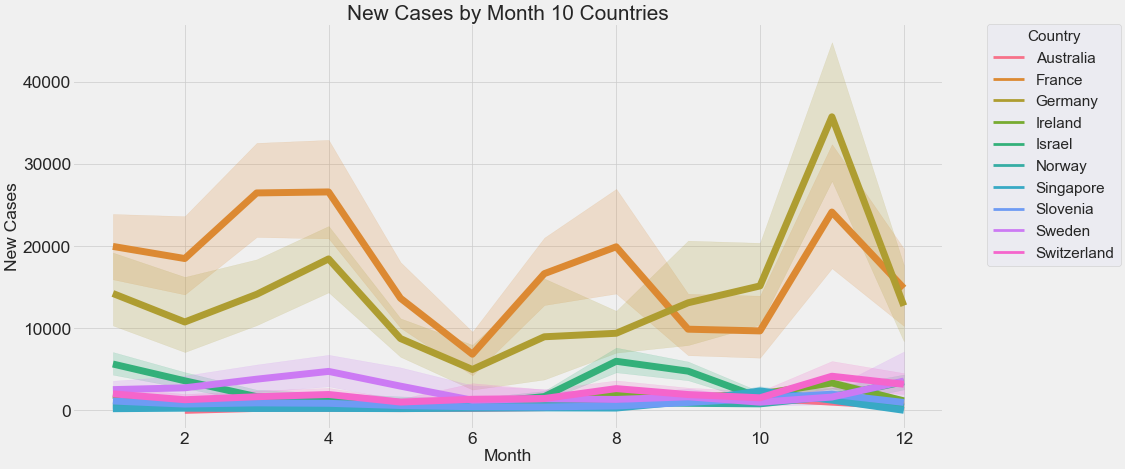

In [50]:
# new cases by month for selected countries
plt.figure(figsize=(20, 10), dpi=50)

sns.lineplot(x=c10d['month'], y=c10d['new_cases'], hue=c10d['country'], linewidth=10)
sns.set(style="darkgrid")
plt.xlabel('Month', fontsize=25)
plt.ylabel('New Cases', fontsize=25)
plt.title("New Cases by Month 10 Countries", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='22', title = "Country",  title_fontsize = "22")
plt.xticks(rotation=0, fontsize=25)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 25)

plt.savefig("DC Output/DC Figures/Fig DC New Cases by Date Selected Countries", dpi='figure', bbox_inches="tight")

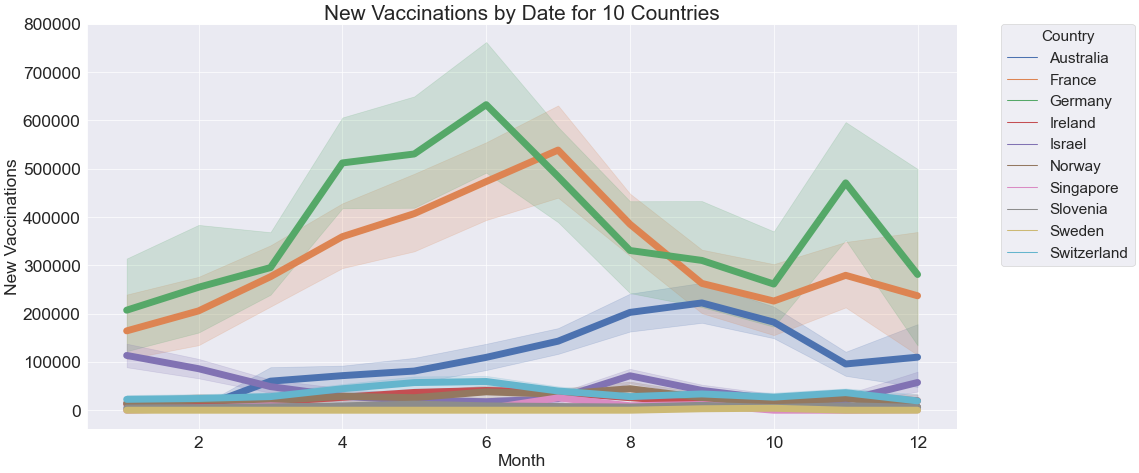

In [51]:
plt.figure(figsize=(20, 10), dpi=50)

sns.lineplot(x=c10d['month'], y=c10d['new_vaccinations'], hue=c10d['country'], linewidth=10)
sns.set(style="darkgrid")
plt.xlabel('Month', fontsize=25)
plt.ylabel('New Vaccinations', fontsize=25)
plt.title("New Vaccinations by Date for 10 Countries", fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='22', title = "Country",  title_fontsize = "22")
plt.xticks(rotation=0, fontsize=25)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 25)



plt.savefig("DC Output/DC Figures/Fig DC New Vaccinations by Month for 10 Countries", dpi='figure', bbox_inches="tight")
    
plt.show()

In [52]:
# dataframe for the selected countries for November latest date with information available for most of the countries
c10n = cases_vaccination.loc[(        (cases_vaccination['country'] == "Singapore")|
                                      (cases_vaccination['country'] == "France") |
                                      (cases_vaccination['country'] == "Slovenia")|
                                      (cases_vaccination['country'] == "Australia")| 
                                      (cases_vaccination['country'] == "Germany")|
                                      (cases_vaccination['country'] == "Ireland")|
                                      (cases_vaccination['country'] == "Switzerland") |
                                      (cases_vaccination['country'] == "Norway")|  
                                      (cases_vaccination['country'] == "Sweden")|
                                      (cases_vaccination['country'] == "Israel"))& 
                                      ((cases_vaccination['date'] != "2021-11-27")& 
                                      (cases_vaccination['new_cases'] >= 0))]


In [53]:
# create separate dataframes for each of the selected countries 
dfcvAus = c10d.loc[(c10d['country'] == "Australia") ]
dfcvFra = c10d.loc[(c10d['country'] == "France") ]
dfcvGerm = c10d.loc[(c10d['country'] == "Germany") ]
dfcvIrel = c10d.loc[(c10d['country'] == "Ireland") ]
dfcvIsra = c10d.loc[(c10d['country'] == "Israel") ]
dfcvNor = c10d.loc[(c10d['country'] == "Norway") ]
dfcvSlo = c10d.loc[(c10d['country'] == "Slovenia") ]
dfcvSing = c10d.loc[(c10d['country'] == "Singapore") ]
dfcvSwe = c10d.loc[(c10d['country'] == "Sweden") ]
dfcvSwi = c10d.loc[(c10d['country'] == "Switzerland") ]



In [54]:
new_cases= cases_vaccination[(cases_vaccination['new_cases'] >= 0) & (cases_vaccination['new_vaccinations'] >= 0)& (cases_vaccination['people_fully_vaccinated_per_hundred_y'] >= 0)]
new_cases=new_cases[["total_cases", "cases_per_hundred", "gdp_per_capita", "vaccination_per_hundred", "max_deaths", "cases_per_vaccination", "population","date","new_cases", "location", "month","people_fully_vaccinated_per_hundred_y", "max_cases", "max_vaccinated" ]]
new_cases_s=new_cases.loc[(new_cases['location'] == "Australia")|(new_cases['location'] == "France")|(new_cases['location'] == "Germany")|(new_cases['location'] == "Ireland")|(new_cases['location'] == "Israel") |(new_cases['location'] == "Norway")|(new_cases['location'] == "Slovenia") | (new_cases['location'] == "Singapore")|(new_cases['location'] == "Sweden") |(new_cases['location'] == "Switzerland") ]

In [55]:
new_cases_s

total_cases  cases_per_hundred  gdp_per_capita  \
2932       28504.0           0.887712       44648.710   
2933       28517.0           0.887712       44648.710   
2934       28536.0           0.887712       44648.710   
2935       28546.0           0.887712       44648.710   
2936       28571.0           0.887712       44648.710   
...            ...                ...             ...   
54058    1078503.0          12.758003       57410.166   
54059    1090928.0          12.758003       57410.166   
54060    1101789.0          12.758003       57410.166   
54061    1111923.0          12.758003       57410.166   
54062    1111923.0          12.758003       57410.166   

       vaccination_per_hundred  max_deaths  cases_per_vaccination  population  \
2932                 74.694637      2104.0               0.011885  25788217.0   
2933                 74.694637      2104.0               0.011885  25788217.0   
2934                 74.694637      2104.0               0.011885  25788217.0   
2935                 74.694637      2104.0               0.011885  25788217.0   
2936                 74.694637      2104.0               0.011885  25788217.0   
...                        ...         ...                    ...         ...   
54058                65.960667     11748.0               0.193418   8715494.0   
54059                65.960667     11748.0               0.193418   8715494.0   
54060                65.960667     11748.0               0.193418   8715494.0   
54061                65.960667     11748.0               0.193418   8715494.0   
54062                65.960667     11748.0               0.193418   8715494.0   

            date  new_cases     location  month  \
2932  2021-03-01       20.0    Australia      3   
2933  2021-04-01       13.0    Australia      4   
2934  2021-05-01       19.0    Australia      5   
2935  2021-06-01       10.0    Australia      6   
2936  2021-07-01       25.0    Australia      7   
...          ...        ...          ...    ...   
54058 2021-07-12     9975.0  Switzerland      7   
54059 2021-08-12    12425.0  Switzerland      8   
54060 2021-09-12    10861.0  Switzerland      9   
54061 2021-10-12    10134.0  Switzerland     10   
54062 2021-11-12        0.0  Switzerland     11   

       people_fully_vaccinated_per_hundred_y  max_cases  max_vaccinated  
2932                                    0.00   228925.0      19262415.0  
2933                                    0.31   228925.0      19262415.0  
2934                                    1.01   228925.0      19262415.0  
2935                                    2.10   228925.0      19262415.0  
2936                                    6.69   228925.0      19262415.0  
...                                      ...        ...             ...  
54058                                  43.53  1111923.0       5748798.0  
54059                                  51.91  1111923.0       5748798.0  
54060                                  55.41  1111923.0       5748798.0  
54061                                  60.45  1111923.0       5748798.0  
54062                                  64.67  1111923.0       5748798.0  

[3434 rows x 14 columns]

In [56]:
print(new_cases_s.corr().to_string())

                                       total_cases  cases_per_hundred  gdp_per_capita  vaccination_per_hundred  max_deaths  cases_per_vaccination  population  new_cases     month  people_fully_vaccinated_per_hundred_y  max_cases  max_vaccinated
total_cases                               1.000000           0.075109       -0.363081                -0.078008    0.926828               0.023860    0.837523   0.606833  0.059511                               0.153165   0.939949        0.837295
cases_per_hundred                         0.075109           1.000000       -0.524433                -0.726085    0.010113               0.984085   -0.199910   0.016942 -0.042165                               0.096675   0.039361       -0.218015
gdp_per_capita                           -0.363081          -0.524433        1.000000                 0.816890   -0.339875              -0.584980   -0.318928  -0.219099 -0.005625                              -0.108433  -0.360741       -0.306528
vaccination_per_hund

In [57]:
new_cases_sn=new_cases_s.loc[(new_cases_s["date"]=="2021-11-27")]

new_cases_sn

total_cases  cases_per_hundred  gdp_per_capita  \
3213      207984.0           0.887712       44648.710   
19513    7691217.0          12.312717       38605.671   
20959    5780814.0           7.781713       45229.245   
26869     556319.0          12.421592       67335.293   
27541    1341881.0          14.527403       33132.320   
41901     259200.0           5.749713       64800.057   
49933     261636.0           5.005721       85535.383   
50805     415898.0          21.126865       31400.840   
53694    1198848.0          12.098403       46949.283   
54048     986834.0          12.758003       57410.166   

       vaccination_per_hundred  max_deaths  cases_per_vaccination  population  \
3213                 74.694637      2104.0               0.011885  25788217.0   
19513                70.804714    121368.0               0.173897  67564251.0   
20959                68.905252    105642.0               0.112934  83900471.0   
26869                76.425173      5788.0               0.162533   4982904.0   
27541                62.307663      8210.0               0.233156   9291000.0   
41901                70.887870      1136.0               0.081110   5465629.0   
49933                87.000000       789.0               0.057537   5453600.0   
50805                56.267478      5394.0               0.375472   2078723.0   
53694                71.461067     15191.0               0.169301  10160159.0   
54048                65.960667     11748.0               0.193418   8715494.0   

            date  new_cases     location  month  \
3213  2021-11-27     1235.0    Australia     11   
19513 2021-11-27    37089.0       France     11   
20959 2021-11-27    44977.0      Germany     11   
26869 2021-11-27     4791.0      Ireland     11   
27541 2021-11-27      340.0       Israel     11   
41901 2021-11-27     1891.0       Norway     11   
49933 2021-11-27     1761.0    Singapore     11   
50805 2021-11-27     2234.0     Slovenia     11   
53694 2021-11-27        0.0       Sweden     11   
54048 2021-11-27        0.0  Switzerland     11   

       people_fully_vaccinated_per_hundred_y  max_cases  max_vaccinated  
3213                                   72.46   228925.0      19262415.0  
19513                                  69.57  8318995.0      47838675.0  
20959                                  67.94  6528894.0      57811831.0  
26869                                  76.10   618956.0       3808193.0  
27541                                  62.16  1349741.0       5789005.0  
41901                                  69.99   314258.0       3874468.0  
49933                                   0.00   272992.0       4744632.0  
50805                                  55.15   439169.0       1169645.0  
53694                                   0.00  1229217.0       7260558.0  
54048                                  65.43  1111923.0       5748798.0

In [58]:
print(new_cases_sn.corr().to_string())


                                       total_cases  cases_per_hundred  gdp_per_capita  vaccination_per_hundred  max_deaths  cases_per_vaccination  population  new_cases  month  people_fully_vaccinated_per_hundred_y  max_cases  max_vaccinated
total_cases                               1.000000           0.067729       -0.365727                -0.091512    0.992378               0.018092    0.915197   0.938261    NaN                               0.242692   0.999520        0.913028
cases_per_hundred                         0.067729           1.000000       -0.499841                -0.722732    0.027340               0.984141   -0.197504  -0.055420    NaN                               0.040530   0.057359       -0.217009
gdp_per_capita                           -0.365727          -0.499841        1.000000                 0.816812   -0.337347              -0.564560   -0.322172  -0.254586    NaN                              -0.347344  -0.356902       -0.309881
vaccination_per_hundred         

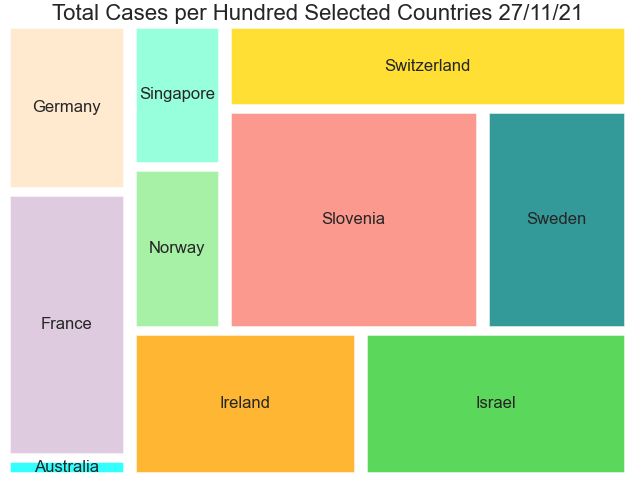

In [59]:
# use a treemap to vizualise the scale of cases numbers for the selected countries
plt.figure(figsize=(18, 14), dpi=40)
plt.title('Total Cases per Hundred Selected Countries 27/11/21', fontsize=40)

plt.rc('font', size=30) 

color = ['aqua', 'thistle', 'bisque', 'orange', 'limegreen', 'lightgreen', 'aquamarine', 'salmon', 'teal', 'gold']
squarify.plot(sizes=new_cases_sn["cases_per_hundred"], color=color, label=new_cases_sn["location"], alpha=.8, pad = True)
plt.axis('off')
plt.savefig("DC Output/DC Figures/Fig DC Total Cases per Hundred Selected Countries 271121", dpi='figure')
plt.show()

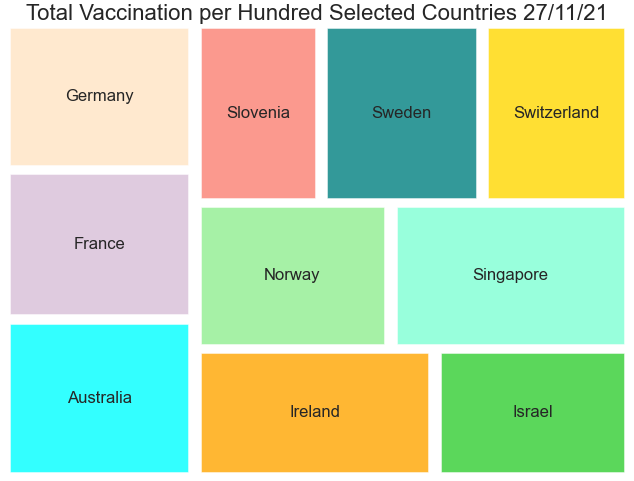

In [60]:
# use a treemap to vizualise the scale of cases numbers for the selected countries

plt.figure(figsize=(18, 14), dpi=40)
plt.title('Total Vaccination per Hundred Selected Countries 27/11/21', fontsize=40)

plt.rc('font', size=30) 

color = ['aqua', 'thistle', 'bisque', 'orange', 'limegreen', 'lightgreen', 'aquamarine', 'salmon', 'teal', 'gold']
squarify.plot(sizes=new_cases_sn["vaccination_per_hundred"], color=color, label=new_cases_sn["location"], alpha=.8, pad = True)
plt.axis('off')
plt.savefig("DC Output/DC Figures/Fig DC Total Vaccination per Hundred Selected Countries 271121", dpi='figure')
plt.show()


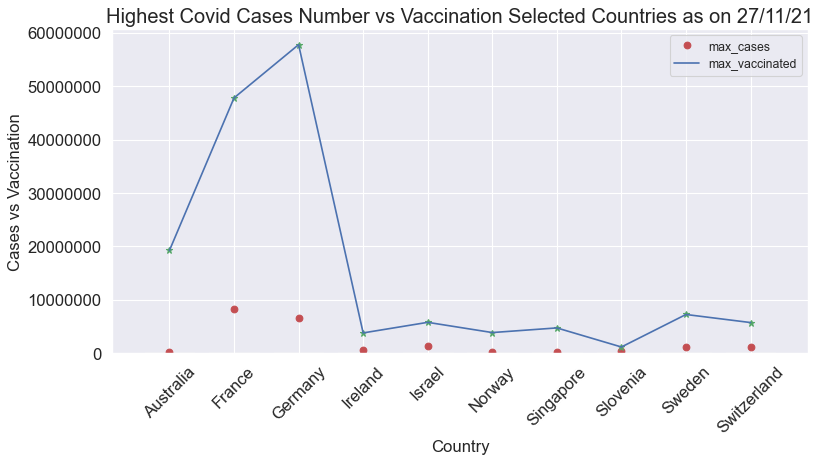

In [61]:
# plot the maximum cases by country and save the figure in a png file

plt.figure(figsize=(10, 5), dpi=80)

plt.bar(new_cases_sn["location"],new_cases_sn["cases_per_hundred"], color="red")

plt.bar(new_cases_sn["location"],new_cases_sn["vaccination_per_hundred"],color="darkblue")
plt.bar(new_cases_sn["location"],new_cases_sn["cases_per_vaccination"],color="green")


plt.plot(new_cases_sn["location"],new_cases_sn["max_cases"],'ro', label="max_cases")
plt.plot(new_cases_sn["location"],new_cases_sn["max_vaccinated"],'g*')
plt.plot(new_cases_sn["location"],new_cases_sn["max_vaccinated"], label="max_vaccinated")


plt.xlabel("Country",fontsize=15)
plt.ylabel("Cases vs Vaccination", fontsize=15)
plt.title("Highest Covid Cases Number vs Vaccination Selected Countries as on 27/11/21", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.legend()
plt.savefig("DC Output/DC Figures/Fig DC Max Cases.png", bbox_inches="tight")
plt.show()



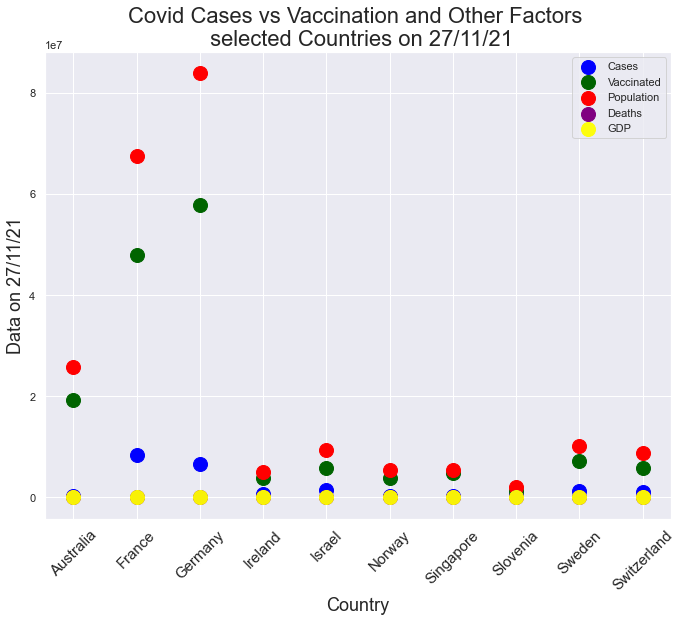

In [62]:
new_cases_sn.groupby("location")

ax = new_cases_sn.plot(kind='scatter', x='location', y='max_cases',color='blue', label='Cases', s=14**2,figsize=(10,8));
new_cases_sn.plot(kind='scatter', x='location', y='max_vaccinated',color='darkgreen', label='Vaccinated', ax=ax, s=14**2);
new_cases_sn.plot(kind='scatter', x='location', y='population',color='red', label='Population', ax=ax, s=14**2);
new_cases_sn.plot(kind='scatter', x='location', y='max_deaths',color='purple', label='Deaths', ax=ax,s=14**2);
new_cases_sn.plot(kind='scatter', x='location', y='gdp_per_capita',color='yellow', label='GDP', ax=ax, s=14**2, alpha=0.95);
plt.title("Covid Cases vs Vaccination and Other Factors \n selected Countries on 27/11/21", fontsize=22)
plt.ylabel("Data on 27/11/21", fontsize=18)
plt.xlabel("Country", fontsize=18)
plt.xticks(rotation=45, fontsize=15)

plt.savefig("DC Output/DC Figures/Fig DC Covid Cases vs Vaccination and Other Factors.png", bbox_inches="tight")
plt.show()

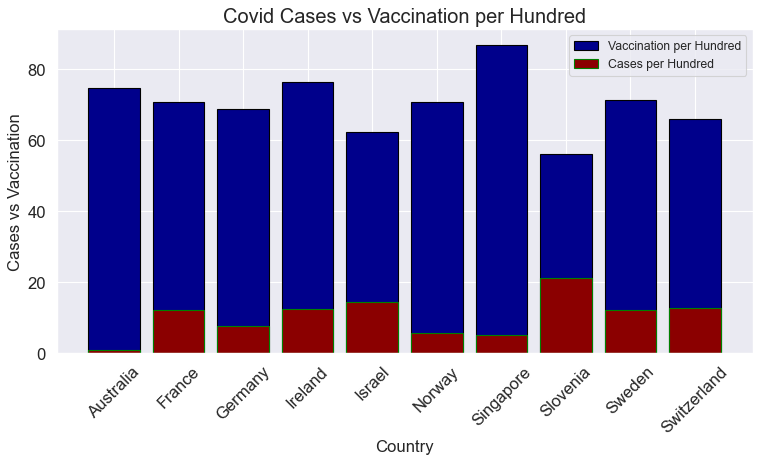

In [63]:
# plot the maximum cases by country and save the figure in a png file

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(new_cases_sn["location"],new_cases_sn["vaccination_per_hundred"], edgecolor="black",color="darkblue", label="Vaccination per Hundred")
plt.bar(new_cases_sn["location"],new_cases_sn["cases_per_hundred"],edgecolor="green", facecolor="darkred", label="Cases per Hundred")


plt.xlabel("Country",fontsize=15)
plt.ylabel("Cases vs Vaccination", fontsize=15)
plt.title("Covid Cases vs Vaccination per Hundred", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(size = 15)
plt.grid(True)
plt.legend()
plt.savefig("DC Output/DC Figures/Fig DC Cases vs Vaccination per Hundred.png", bbox_inches="tight")
plt.show()


In [64]:
# vaccination per hundred selected countries 

fig = px.bar(new_cases_sn, 
             y = 'vaccination_per_hundred',
             x = "location",
             color = 'vaccination_per_hundred',
             color_discrete_sequence= px.colors.sequential.Magma
            )
fig.update_layout(
    title={
            'text' : "Vaccination selected countries",
            'y':0.96,
            'x':0.45
        },
    xaxis_title="Country",
    yaxis_title="Vaccinated per Hundred",
    legend_title="Vaccination Selected Countries"
)

#fig.savefig("DC Output/DC Figures/FigDCVaccinationPerHundred.png")

fig.show()




In [65]:
new_cases_sn[["location", "total_cases", "population", "max_cases", "cases_per_hundred"]]

location  total_cases  population  max_cases  cases_per_hundred
3213     Australia     207984.0  25788217.0   228925.0           0.887712
19513       France    7691217.0  67564251.0  8318995.0          12.312717
20959      Germany    5780814.0  83900471.0  6528894.0           7.781713
26869      Ireland     556319.0   4982904.0   618956.0          12.421592
27541       Israel    1341881.0   9291000.0  1349741.0          14.527403
41901       Norway     259200.0   5465629.0   314258.0           5.749713
49933    Singapore     261636.0   5453600.0   272992.0           5.005721
50805     Slovenia     415898.0   2078723.0   439169.0          21.126865
53694       Sweden    1198848.0  10160159.0  1229217.0          12.098403
54048  Switzerland     986834.0   8715494.0  1111923.0          12.758003

In [66]:
# cases per hundred selected countries 

fig = px.bar(new_cases_sn, 
             y = 'cases_per_hundred',
             x = "location",
             color = 'cases_per_hundred',
             color_discrete_sequence= px.colors.sequential.Plasma
            )
fig.update_layout(
    title={
            'text' : "Cases Selected Countries",
            'y':0.96,
            'x':0.45
        },
    xaxis_title="Country",
    yaxis_title="Cases per Hundred",
    legend_title="Cases Selected Countries"
)
#fig.savefig("DC Output/DC Figures/FigDCCasesPerHundred.png")
fig.show()





Summary Statistics

The r-squared is: 0.7496373824978948


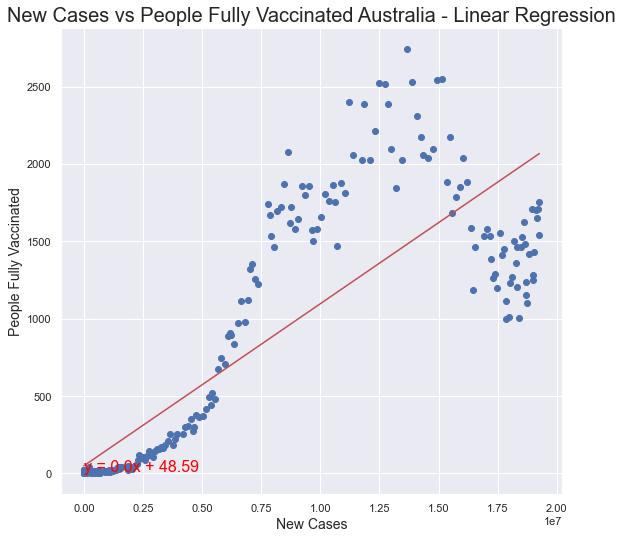

In [67]:

plt.rcParams['figure.figsize'] = [8, 8]
x_values = dfcvAus["people_fully_vaccinated_x"]
y_values = dfcvAus["new_cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.title('New Cases vs People Fully Vaccinated Australia - Linear Regression', fontsize=20)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Australia - Linear Regression", dpi='figure', bbox_inches="tight")
plt.show()

The r-squared is: 0.16900316655384656


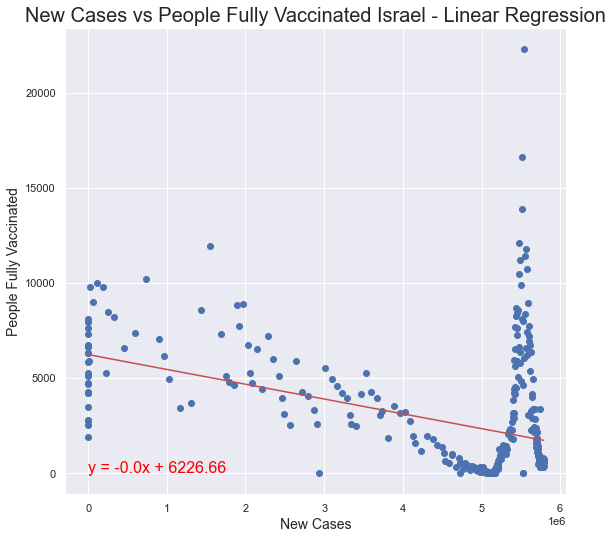

In [68]:

plt.rcParams['figure.figsize'] = [8, 8]
x_values = dfcvIsra["people_fully_vaccinated_x"]
y_values = dfcvIsra["new_cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.title('New Cases vs People Fully Vaccinated Israel - Linear Regression', fontsize=20)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Israel - Linear Regression", dpi='figure')
plt.show()

The r-squared is: 0.02748220511411444


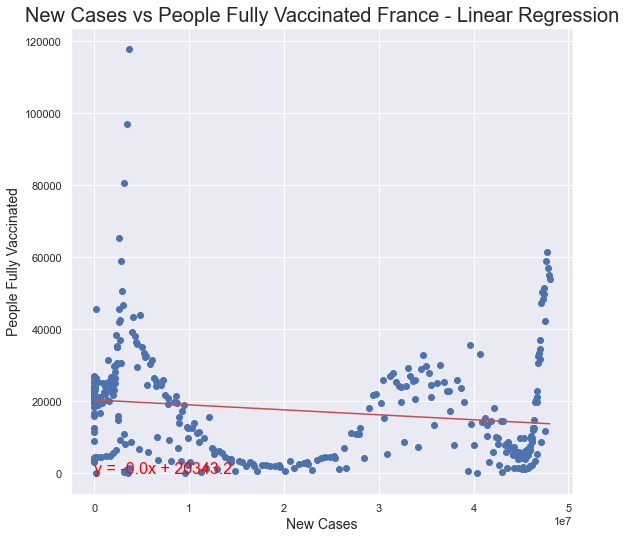

In [69]:

plt.rcParams['figure.figsize'] = [8, 8]
x_values = dfcvFra["people_fully_vaccinated_x"]
y_values = dfcvFra["new_cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.title('New Cases vs People Fully Vaccinated France - Linear Regression', fontsize=20)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated France - Linear Regression", dpi='figure', bbox_inches="tight")
plt.show()

In [70]:
# organise data to plot into a box plot

Australia_df=cases_vaccination.loc[cases_vaccination["location"]=='Australia']
Australia_new_cases=Australia_df["new_cases"]

France_df=cases_vaccination.loc[cases_vaccination["location"]=='France']
France_new_cases=France_df["new_cases"]

Germany_df=cases_vaccination.loc[cases_vaccination["location"]=='Germany']
Germany_new_cases=Germany_df["new_cases"]

Ireland_df=cases_vaccination.loc[cases_vaccination["location"]=='Ireland']
Ireland_new_cases=Ireland_df["new_cases"]

Israel_df=cases_vaccination.loc[cases_vaccination["location"]=='Israel']
Israel_new_cases=Israel_df["new_cases"]

Norway_df=cases_vaccination.loc[cases_vaccination["location"]=='Norway']
Norway_new_cases=Norway_df["new_cases"]

Slovenia_df=cases_vaccination.loc[cases_vaccination["location"]=='Slovenia']
Slovenia_new_cases=Slovenia_df["new_cases"]

Singapore_df=cases_vaccination.loc[cases_vaccination["location"]=='Singapore']
Singapore_new_cases=Singapore_df["new_cases"]

Sweden_df=cases_vaccination.loc[cases_vaccination["location"]=='Sweden']
Sweden_new_cases=Sweden_df["new_cases"]

Switzerland_df=cases_vaccination.loc[cases_vaccination["location"]=='Switzerland']
Switzerland_new_cases=Switzerland_df["new_cases"]



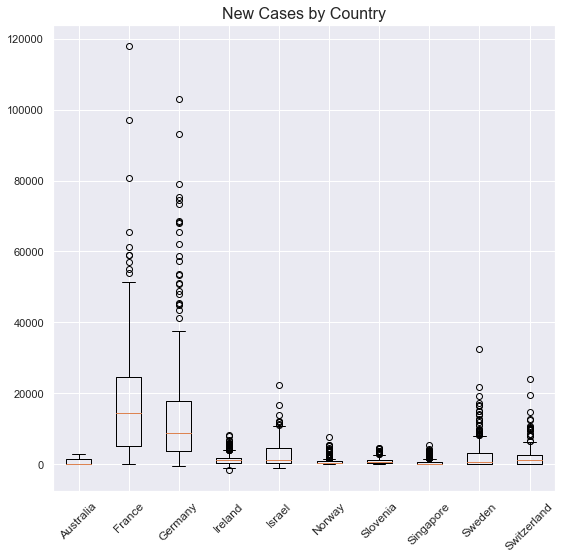

In [71]:
# Generate a box plot of for new cases for selected countries

data_to_plot = [Australia_new_cases,
                France_new_cases,
                Germany_new_cases,
                Ireland_new_cases,
                Israel_new_cases,
                Norway_new_cases,
                Slovenia_new_cases,
                Singapore_new_cases,
                Sweden_new_cases,
                Switzerland_new_cases]



fig1, ax1 = plt.subplots()

ax1.set_title('New Cases by Country', fontsize=16)

ax1.boxplot(data_to_plot)


plt.xticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10], ['Australia', 'France', 'Germany', 'Ireland', "Israel", "Norway", "Slovenia", "Singapore", "Sweden", "Switzerland"], rotation=45, fontsize=12)


plt.savefig("DC Output/DC Figures/Fig DC Box Plot New Cases.png", bbox_inches="tight")

plt.show()


In [72]:
# select countries that have the highest reported cases as per https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/ (29/12/21)

US_df=cases_vaccination.loc[cases_vaccination["location"]=='United States']
US_new_cases=US_df["new_cases"]

India_df=cases_vaccination.loc[cases_vaccination["location"]=='India']
India_new_cases=India_df["new_cases"]

Brazil_df=cases_vaccination.loc[cases_vaccination["location"]=='Brazil']
Brazil_new_cases=Brazil_df["new_cases"]

UK_df=cases_vaccination.loc[cases_vaccination["location"]=='United Kingdom']
UK_new_cases=UK_df["new_cases"]

Russia_df=cases_vaccination.loc[cases_vaccination["location"]=='Russia']
Russia_new_cases=Russia_df["new_cases"]

Turkey_df=cases_vaccination.loc[cases_vaccination["location"]=='Turkey']
Turkey_new_cases=Turkey_df["new_cases"]

#France_df=cases_vaccination.loc[cases_vaccination["location"]=='France']
#France_new_cases=France_df["new_cases"]

#Germany_df=cases_vaccination.loc[cases_vaccination["location"]=='Germany']
#Germany_new_cases=Germany_df["new_cases"]

Iran_df=cases_vaccination.loc[cases_vaccination["location"]=='Iran']
Iran_new_cases=Iran_df["new_cases"]

Spain_df=cases_vaccination.loc[cases_vaccination["location"]=='Spain']
Spain_new_cases=Spain_df["new_cases"]


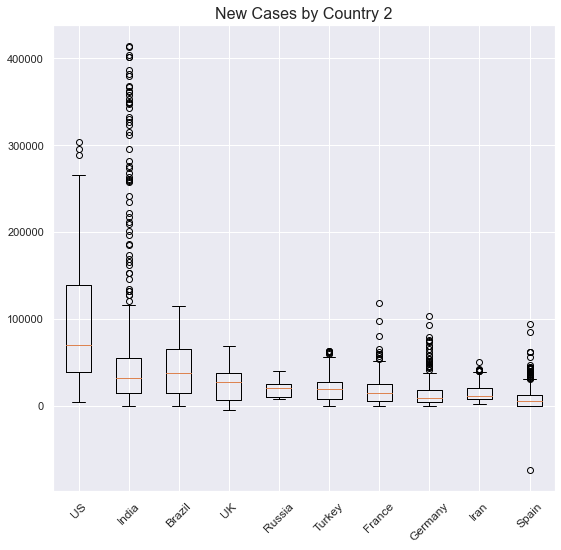

In [73]:
# Generate a box plot of for new cases for selected countries

data_to_plot = [US_new_cases,
                India_new_cases,
                Brazil_new_cases,
                UK_new_cases,
                Russia_new_cases,
                Turkey_new_cases,
                France_new_cases,
                Germany_new_cases,
                Iran_new_cases,
                Spain_new_cases]



fig1, ax1 = plt.subplots()

ax1.set_title('New Cases by Country 2', fontsize=16)

ax1.boxplot(data_to_plot)


plt.xticks([1, 2, 3, 4, 5, 6, 7,  8, 9, 10], ['US', 'India', 'Brazil', 'UK', "Russia", "Turkey", "France", "Germany", "Iran", "Spain"], rotation=45, fontsize=12)


plt.savefig("DC Output/DC Figures/Fig DC Box Plot New Cases 2.png", bbox_inches="tight")

plt.show()

In [74]:
# look for any correlation between cases and other factors in India
India_df.groupby("date")
India_c_v_df=India_df[["new_cases", "people_fully_vaccinated_y", "new_deaths"]]


print(India_c_v_df.corr().to_string())

                           new_cases  people_fully_vaccinated_y  new_deaths
new_cases                    1.00000                  -0.204970    0.805150
people_fully_vaccinated_y   -0.20497                   1.000000   -0.118198
new_deaths                   0.80515                  -0.118198    1.000000


The r-squared is: 0.04201288971938073


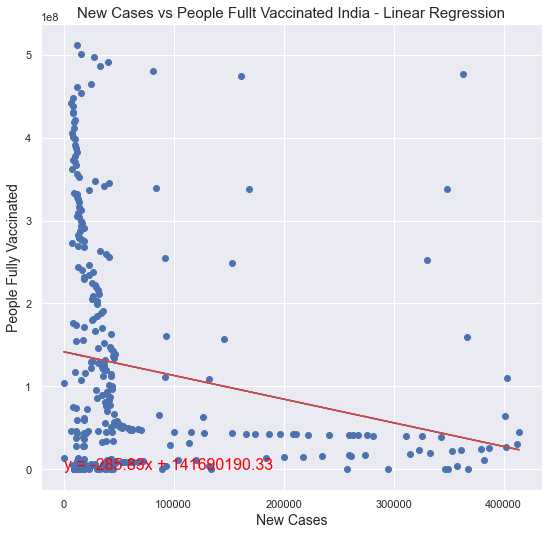

In [75]:

plt.rcParams['figure.figsize'] = [8, 8]
x_values = India_c_v_df["new_cases"]
y_values = India_c_v_df["people_fully_vaccinated_y"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.title('New Cases vs People Fullt Vaccinated India - Linear Regression', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated India - Linear Regression 1", dpi='figure', bbox_inches="tight")
plt.show()

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the daily new cases 

# Use groupby and summary statistical methods to calculate the following properties: 
# mean, median, variance, standard deviation, and SEM of the new_cases. 
# Assemble the resulting series into a single summary dataframe.

# create a dataframe grouped by new cases
cases_new = cases_vaccination.groupby("country")

# calculate summary statistics of the tumor volume
new_cases_mean =cases_new["new_cases"].mean()
new_cases_median =cases_new["new_cases"].median()
new_cases_variance =cases_new["new_cases"].var()
new_cases_std =cases_new["new_cases"].std()
new_cases_sem =cases_new["new_cases"].sem()

# create a summary table to present the calculated values by country

summary_cases_new_df=pd.DataFrame({"Mean":new_cases_mean,
                                   "Median":new_cases_median,
                                   "Variation":new_cases_variance,
                                   "Standard Deviation":new_cases_std,
                                   "SEM":new_cases_sem})
summary_cases_new_df.head()

Mean  Median      Variation  Standard Deviation        SEM
country                                                                      
Afghanistan  333.992832    87.0  292992.014337          541.287368  32.406027
Albania      420.858859   413.0  124041.585441          352.195380  19.300188
Algeria      332.248366   198.5  113224.213522          336.488059  19.235742
Andorra       31.269841    17.0    3542.044788           59.515080   3.353295
Angola       146.123239   111.5   15013.020094          122.527630   7.270677

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the new cases
# Using the aggregation method

aggr_new_cases_df = cases_new.agg(["mean", "median", "var", "std", "sem", "max"])["new_cases"]

aggr_new_cases_df.tail(15)



mean   median           var           std  \
country                                                                   
Tuvalu                    0.000000      0.0  0.000000e+00      0.000000   
Uganda                  299.521739     81.0  1.733370e+06   1316.574918   
Ukraine                7924.109966   5501.0  4.991658e+07   7065.166587   
United Arab Emirates   1540.967742   1550.0  1.156386e+06   1075.354041   
United Kingdom        24248.020896  27244.0  2.980375e+08  17263.762377   
United States         92306.054945  69251.0  4.868570e+09  69775.137259   
Uruguay                1168.652778    414.0  1.807878e+06   1344.573462   
Uzbekistan              400.811765    359.0  5.967402e+04    244.282663   
Vanuatu                   0.021164      0.0  4.210289e-02      0.205190   
Venezuela               982.552448   1009.5  3.499265e+05    591.545815   
Vietnam                4670.769784   2787.0  3.001375e+07   5478.480286   
Wallis and Futuna         0.000000      0.0  0.000000e+00      0.000000   
Yemen                    18.346154     12.0  3.408458e+02     18.462009   
Zambia                  521.475207    132.5  5.971688e+05    772.766981   
Zimbabwe                446.442568     74.5  9.933575e+05    996.673238   

                              sem       max  
country                                      
Tuvalu                   0.000000       0.0  
Uganda                  79.248497   21324.0  
Ukraine                414.167400   28477.0  
United Arab Emirates    58.233686    4471.0  
United Kingdom         943.220098   68192.0  
United States         3657.210918  303487.0  
Uruguay                 79.229751    7289.0  
Uzbekistan              15.297574     974.0  
Vanuatu                  0.014925       2.0  
Venezuela               34.978837    2979.0  
Vietnam                328.577412   39132.0  
Wallis and Futuna        0.000000       0.0  
Yemen                    1.280110     100.0  
Zambia                  49.675343    3594.0  
Zimbabwe                57.930455    9185.0

In [78]:
# calculate the quartiles for a Israel and identify potential outliers
israel_df=cases_vaccination.loc[cases_vaccination["location"]=='Spain']
israel_new_cases=israel_df["new_cases"]

quartiles = israel_new_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases for Spain is: {lowerq}")
print(f"The upper quartile of new cases for Spain is: {upperq}")
print(f"The interquartile range of new cases for Spain is: {iqr}")
print(f"The the median of of new cases for Spain is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases for Spain is: 0.0
The upper quartile of new cases for Spain is: 12370.0
The interquartile range of new cases for Spain is: 12370.0
The the median of of new cases for Spain is: 5270.0 
Values below -18555.0 could be outliers.
Values above 30925.0 could be outliers.


In [79]:
# calculate the quartiles for a Israel and identify potential outliers
israel_df=cases_vaccination.loc[cases_vaccination["location"]=='Israel']
israel_new_cases=israel_df["new_cases"]

quartiles = israel_new_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases for Israel is: {lowerq}")
print(f"The upper quartile of new cases for Israel is: {upperq}")
print(f"The interquartile range of new cases for Israel is: {iqr}")
print(f"The the median of of new cases for Israel is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases for Israel is: 290.0
The upper quartile of new cases for Israel is: 4617.5
The interquartile range of new cases for Israel is: 4327.5
The the median of of new cases for Israel is: 1111.0 
Values below -6201.25 could be outliers.
Values above 11108.75 could be outliers.


In [80]:
# calculate the quartiles for a Australia and identify potential outliers
australia_df=cases_vaccination.loc[cases_vaccination["location"]=='Australia']
australia_new_cases=australia_df["new_cases"]

quartiles = australia_new_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases for Australia is: {lowerq}")
print(f"The upper quartile of new cases for Australia is: {upperq}")
print(f"The interquartile range of new cases for Australia is: {iqr}")
print(f"The the median of of new cases for Australia is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases for Australia is: 12.0
The upper quartile of new cases for Australia is: 1429.75
The interquartile range of new cases for Australia is: 1417.75
The the median of of new cases for Australia is: 49.5 
Values below -2114.625 could be outliers.
Values above 3556.375 could be outliers.


In [81]:
# calculate the quartiles for a United States and identify potential outliers
us_df=cases_vaccination.loc[cases_vaccination["location"]=='United States']
us_new_cases=us_df["new_cases"]

quartiles = us_new_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases for United States is: {lowerq}")
print(f"The upper quartile of new cases for United States is: {upperq}")
print(f"The interquartile range of new cases for United States is: {iqr}")
print(f"The the median of of new cases for United States is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases for United States is: 38376.0
The upper quartile of new cases for United States is: 138466.75
The interquartile range of new cases for United States is: 100090.75
The the median of of new cases for United States is: 69251.0 
Values below -111760.125 could be outliers.
Values above 288602.875 could be outliers.


In [82]:
# calculate the quartiles of new cases for all countries and dates available and identify potential outliers

new_cases_only=cases_vaccination["new_cases"]

quartiles = new_cases_only.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases is: {lowerq}")
print(f"The upper quartile of new cases is: {upperq}")
print(f"The interquartile range of new cases is: {iqr}")
print(f"The the median of of new cases is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases is: 0.0
The upper quartile of new cases is: 1247.0
The interquartile range of new cases is: 1247.0
The the median of of new cases is: 142.0 
Values below -1870.5 could be outliers.
Values above 3117.5 could be outliers.


In [83]:
# calculate the quartiles for and identify potential outliers
australia_df=cases_vaccination.loc[cases_vaccination["location"]=='Australia']
australia_new_cases=australia_df["new_cases"]

quartiles = australia_new_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new cases for Australia is: {lowerq}")
print(f"The upper quartile of new cases for Australia is: {upperq}")
print(f"The interquartile range of new cases for Australia is: {iqr}")
print(f"The the median of of new cases for Australia is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new cases for Australia is: 12.0
The upper quartile of new cases for Australia is: 1429.75
The interquartile range of new cases for Australia is: 1417.75
The the median of of new cases for Australia is: 49.5 
Values below -2114.625 could be outliers.
Values above 3556.375 could be outliers.


In [84]:
cases_new.describe()

C:\Users\Danluta\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning:

invalid value encountered in subtract



total_cases                                          \
                        count           mean            std       min   
country                                                                 
Afghanistan             279.0  110184.681004   44711.710427   52709.0   
Albania                 333.0  136347.639640   35533.236660   58991.0   
Algeria                 306.0  155950.303922   39757.892918  100159.0   
Andorra                 315.0   13647.949206    2178.932532    8166.0   
Angola                  284.0   41060.482394   15733.355883   17642.0   
...                       ...            ...            ...       ...   
Vietnam                 278.0  340788.061151  429757.693420    1497.0   
Wallis and Futuna       221.0       0.000000       0.000000       0.0   
Yemen                   208.0    7447.250000    2153.165649    2102.0   
Zambia                  242.0  156338.702479   58402.525250   22645.0   
Zimbabwe                296.0   79497.773649   44791.928510   15265.0   

                                                             new_cases  \
                         25%       50%        75%        max     count   
country                                                                  
Afghanistan         58125.50  129021.0  154734.50   157858.0     279.0   
Albania            124134.00  132496.0  161324.00   203524.0     333.0   
Algeria            118412.50  140088.0  201902.50   212652.0     306.0   
Andorra             12307.00   13882.0   15124.00    19440.0     315.0   
Angola              25579.75   39919.5   53950.00    65397.0     284.0   
...                      ...       ...        ...        ...       ...   
Vietnam              2859.00   36824.0  744251.50  1398413.0     278.0   
Wallis and Futuna       0.00       0.0       0.00        0.0     221.0   
Yemen                6805.75    7192.5    9377.25    10063.0     208.0   
Zambia              92442.00  191071.0  209035.00   210959.0     242.0   
Zimbabwe            37657.75   56988.5  128340.50   165002.0     296.0   

                                ... cases_per_vaccination            \
                          mean  ...                   75%       max   
country                         ...                                   
Afghanistan         333.992832  ...              0.044265  0.044265   
Albania             420.858859  ...              0.207116  0.207116   
Algeria             332.248366  ...              0.039444  0.039444   
Andorra              31.269841  ...              0.386228  0.386228   
Angola              146.123239  ...              0.019723  0.019723   
...                        ...  ...                   ...       ...   
Vietnam            4670.769784  ...              0.024801  0.024801   
Wallis and Futuna     0.000000  ...              0.000000  0.000000   
Yemen                18.346154  ...              0.027451  0.027451   
Zambia              521.475207  ...              0.256786  0.256786   
Zimbabwe            446.442568  ...              0.055725  0.055725   

                  max_deaths                                           \
                       count     mean  std      min      25%      50%   
country                                                                 
Afghanistan            279.0   7325.0  0.0   7325.0   7325.0   7325.0   
Albania                333.0   3132.0  0.0   3132.0   3132.0   3132.0   
Algeria                306.0   6137.0  0.0   6137.0   6137.0   6137.0   
Andorra                315.0    133.0  0.0    133.0    133.0    133.0   
Angola                 284.0   1737.0  0.0   1737.0   1737.0   1737.0   
...                      ...      ...  ...      ...      ...      ...   
Vietnam                278.0  27611.0  0.0  27611.0  27611.0  27611.0   
Wallis and Futuna      221.0      0.0  0.0      0.0      0.0      0.0   
Yemen                  208.0   1968.0  0.0   1968.0   1968.0   1968.0   
Zambia                 242.0   3669.0  0.0   3669.0   3669.0   3669.0   
Zimbabwe      

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the new vaccinations* 
# Using the aggregation method

aggr_new_vacinations_df = cases_new.agg(["mean", "median", "var", "std", "sem", "max"])["new_vaccinations"]

aggr_new_vacinations_df.head(15)


mean    median           var            std  \
country                                                                     
Afghanistan              24.637993       0.0  8.677966e+04     294.583870   
Albania                3835.117117       0.0  2.660718e+07    5158.214545   
Algeria                 558.124183       0.0  7.257320e+07    8518.990681   
Andorra                  15.244444       0.0  3.765212e+04     194.041546   
Angola                    0.000000       0.0  0.000000e+00       0.000000   
Anguilla                  4.833333       0.0  6.868167e+03      82.874403   
Antigua and Barbuda      27.668942       0.0  4.302569e+04     207.426343   
Argentina            189387.685879  171336.0  2.642525e+10  162558.442667   
Armenia                   0.000000       0.0  0.000000e+00       0.000000   
Aruba                   433.708696     111.5  6.027391e+05     776.362747   
Australia            125693.023810  101837.0  1.081699e+10  104004.773045   
Austria               43147.088825   29850.0  1.304342e+09   36115.678075   
Azerbaijan            24451.677812   16639.0  7.076900e+08   26602.443482   
Bahamas                   9.109890       0.0  2.073372e+04     143.992094   
Bahrain                7314.429379    6041.5  5.062027e+07    7114.792565   

                             sem        max  
country                                      
Afghanistan            17.636275     4015.0  
Albania               282.668416    23655.0  
Algeria               486.998283   147230.0  
Andorra                10.933003     2829.0  
Angola                  0.000000        0.0  
Anguilla                4.833333     1421.0  
Antigua and Barbuda    12.117976     2221.0  
Argentina            8726.594432  1297018.0  
Armenia                 0.000000        0.0  
Aruba                  51.191844     5076.0  
Australia            6065.681542   349856.0  
Austria              1933.227925   158812.0  
Azerbaijan           1466.640185   116709.0  
Bahamas                 8.714798     2377.0  
Bahrain               378.146958    81811.0

In [86]:
# calculate the quartiles of new vaccinations for all countries and dates available and identify potential outliers

new_vaccinations_only=cases_vaccination["new_vaccinations"]

quartiles = new_vaccinations_only.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of new vaccinations is: {lowerq}")
print(f"The upper quartile of new vaccinations is: {upperq}")
print(f"The interquartile range of new vaccinations is: {iqr}")
print(f"The the median of of new vaccinations is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of new vaccinations is: 0.0
The upper quartile of new vaccinations is: 14020.0
The interquartile range of new vaccinations is: 14020.0
The the median of of new vaccinations is: 0.0 
Values below -21030.0 could be outliers.
Values above 35050.0 could be outliers.


In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the people_fully_vaccinated_per_hundred_x
# Using the aggregation method

aggr_fully_vacinated_df = cases_new.agg(["mean", "median", "var", "std", "sem", "max"])["people_fully_vaccinated_per_hundred_x"]

aggr_fully_vacinated_df.head(10)


mean  median         var        std       sem    max
country                                                                       
Afghanistan           0.115699   0.000    0.787754   0.887555  0.053137   8.95
Albania               9.211862   0.000  140.022321  11.833103  0.648450  34.20
Algeria               0.465425   0.000    4.879247   2.208902  0.126275  12.08
Andorra               1.772698   0.000   82.821592   9.100637  0.512763  65.07
Angola                0.387500   0.000    1.936257   1.391495  0.082570   9.77
Anguilla              3.318129   0.000  165.027006  12.846284  0.749210  60.98
Antigua and Barbuda   7.223652   0.000  231.506766  15.215346  0.888890  58.63
Argentina            18.123314   6.850  489.569168  22.126210  1.187797  67.85
Armenia               0.481594   0.000    4.441629   2.107517  0.133025  17.42
Aruba                42.912391  54.665  795.630586  28.206924  1.859910  73.14

In [88]:

Australia_df['Au_max_vaccin_per_month'] = Australia_df.groupby('month')["people_fully_vaccinated_per_hundred_x"].transform('max')
Australia_df['Au_sum_new_cases_per_month'] = Australia_df.groupby('month')["new_cases"].transform('sum')
Australia_df

<ipython-input-88-587598a7c7ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-587598a7c7ce>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



iso_code continent   location       date  total_cases  new_cases  \
2932      AUS   Oceania  Australia 2021-03-01      28504.0       20.0   
2933      AUS   Oceania  Australia 2021-04-01      28517.0       13.0   
2934      AUS   Oceania  Australia 2021-05-01      28536.0       19.0   
2935      AUS   Oceania  Australia 2021-06-01      28546.0       10.0   
2936      AUS   Oceania  Australia 2021-07-01      28571.0       25.0   
...       ...       ...        ...        ...          ...        ...   
3221      AUS   Oceania  Australia 2021-07-12     222260.0     1705.0   
3222      AUS   Oceania  Australia 2021-08-12     223914.0     1654.0   
3223      AUS   Oceania  Australia 2021-09-12     225625.0     1711.0   
3224      AUS   Oceania  Australia 2021-10-12     227382.0     1757.0   
3225      AUS   Oceania  Australia 2021-11-12     228925.0     1543.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
2932              23.857         909.0         0.0                0.000  ...   
2933              24.000         909.0         0.0                0.000  ...   
2934              22.143         909.0         0.0                0.000  ...   
2935              20.143         909.0         0.0                0.000  ...   
2936              20.857         909.0         0.0                0.000  ...   
...                  ...           ...         ...                  ...  ...   
3221            1515.000        2072.0         7.0                8.714  ...   
3222            1508.143        2082.0        10.0                8.714  ...   
3223            1535.143        2084.0         2.0                7.286  ...   
3224            1542.143        2100.0        16.0                8.286  ...   
3225            1584.143        2104.0         4.0                7.714  ...   

      max_cases  max_vaccinated  cases_per_hundred  month  year  \
2932   228925.0      19262415.0           0.887712      3  2021   
2933   228925.0      19262415.0           0.887712      4  2021   
2934   228925.0      19262415.0           0.887712      5  2021   
2935   228925.0      19262415.0           0.887712      6  2021   
2936   228925.0      19262415.0           0.887712      7  2021   
...         ...             ...                ...    ...   ...   
3221   228925.0      19262415.0           0.887712      7  2021   
3222   228925.0      19262415.0           0.887712      8  2021   
3223   228925.0      19262415.0           0.887712      9  2021   
3224   228925.0      19262415.0           0.887712     10  2021   
3225   228925.0      19262415.0           0.887712     11  2021   

      vaccination_per_hundred  cases_per_vaccination  max_deaths  \
2932                74.694637               0.011885      2104.0   
2933                74.694637               0.011885      2104.0   
2934                74.694637               0.011885      2104.0   
2935                74.694637               0.011885      2104.0   
2936                74.694637               0.011885      2104.0   
...                       ...                    ...         ...   
3221                74.694637               0.011885      2104.0   
3222                74.694637               0.011885      2104.0   
3223                74.694637               0.011885      2104.0   
3224                74.694637               0.011885      2104.0   
3225                74.694637               0.011885      2104.0   

      Au_max_vaccin_per_month  Au_sum_new_cases_per_month  
2932                    73.53                      7554.0  
2933                    73.64                      7694.0  
2934                    73.71                      6954.0  
2935                    73.89                      7340.0  
2936                    74.07                     10644.0  
...                       ...                         ...  
3221                    74.07                     10644.0  
3222                    74.26                     24519.0  
3223 

The r-squared is: 0.06553315778975147


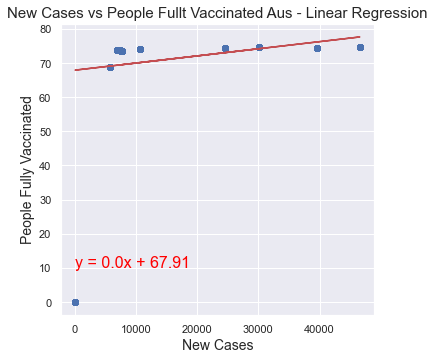

In [89]:

plt.rcParams['figure.figsize'] = [5, 5]
x_values = Australia_df["Au_sum_new_cases_per_month"]
y_values = Australia_df["Au_max_vaccin_per_month"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.title('New Cases vs People Fullt Vaccinated Aus - Linear Regression', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Australia - Linear Regression 1", dpi='figure', bbox_inches="tight")
plt.show()

The r-squared is: 0.05132552904528773


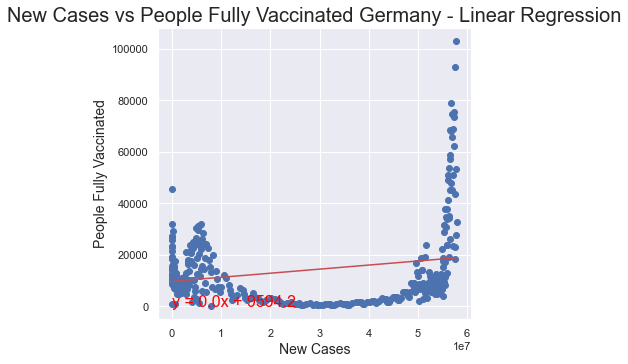

In [90]:

plt.rcParams['figure.figsize'] = [5, 5]
x_values = dfcvGerm["people_fully_vaccinated_x"]
y_values = dfcvGerm["new_cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.xlabel('New Cases', fontsize=14)
plt.ylabel('People Fully Vaccinated', fontsize=14)
plt.title('New Cases vs People Fully Vaccinated Germany - Linear Regression', fontsize=20)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("DC Output/DC Figures/Fig DC New Cases vs People Fully Vaccinated Germany - Linear Regression", dpi='figure', bbox_inches="tight")
plt.show()

In [91]:
# realtime update for latest COVID Data using Python library
# Current or historical COVID data retrieval (Granularity level of the data: 1 Country level 2 State, region or canton level 3 City or municipality level)

from datetime import date

x, src = covid19("Australia", level = 2, start = date(2021,12,29),verbose=False)

print(x)

              id       date  confirmed  deaths  recovered       tests  \
41623   165128d0 2021-12-29     7631.0     5.0     1267.0   3015820.0   
60765   1f999f12 2021-12-29     1150.0     9.0     1116.0   2043600.0   
114333  36068882 2021-12-29     8500.0     7.0     2151.0   5433606.0   
178704  5c4dd6e0 2021-12-29   154243.0   657.0     2802.0  24924083.0   
212378  6c5dccdb 2021-12-29   165612.0  1513.0   144097.0  17209599.0   
268076  86525f8e 2021-12-29      542.0    13.0      225.0    446819.0   
316780  a079fdb2 2021-12-29      475.0     1.0      282.0    580443.0   
481173  f42f23e3 2021-12-29     3324.0    15.0     2239.0    734269.0   

        vaccines  people_vaccinated  people_fully_vaccinated   hosp  ...  \
41623        0.0                0.0                      0.0   36.0  ...   
60765        0.0                0.0                      0.0    0.0  ...   
114333       0.0                0.0                      0.0   89.0  ...   
178704       0.0                0.0   

Refereneces
https://matplotlib.org/
https://pandas.pydata.org/docs/
https://www.analyticsvidhya.com/blog/2021/05/
https://www.kdnuggets.com/2019/10/5-advanced-features-pandas.html
https://chrisalbon.com/
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.